# I. Perkenalan

```py
'''
================================================================
Nama: Syihabuddin Ahmad S
Batch: HCK-017

Program ini dibuat untuk melakukan item classification berdasarkan apakah item tersebut low defect atau high defect. Metode yang akan ditest adalah algoritma classification diantaranya adalah KNN, SVM, Decision Tree, Random Forest dan algoritma boosting yang saya pilih adalah XGBoost. 

Objektif dari pembuatan program ini adalah untuk membuat sebuah model klasifikasi dengan metrics score yang diperhatikan adalah recall, hal ini diharapkan jangan sampai model memprediksi item yang high defect sebagai low defect.
================================================================
'''
```


# II. Import Libraries

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Feature Engineering
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from scipy.stats import kendalltau,spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# For Model Definition & Training
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For Model Evaluation
from sklearn.metrics import make_scorer, confusion_matrix, recall_score,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score


# For Saving Models
import pickle

# To Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# III. Data Loading

Pembuatan model yang saya lakukan adalah model klasifikasi yang menggunakan dataset yang tersedia pada kaggle, dataset ini berupa data sebuah manufacturer  item, tujuan dari penelitian ini adalah untuk memprediksi dan mengklasifikasi perihal apakah barang tersebut memiliki kecacatan yang tinggi atau yang bisa saya sebut sebagai barang cacat atau kecacatan yang rendah atau yang bisa saya sebut sebagai barang tidak cacat.

**Dataset Information**:<br>

| **Column Names** | **Description** |
| --- | --- |
| `ProductionVolume` | Number of units produced per day |
| `ProductionCost` | Cost incurred for production per day |
| `SupplierQuality` | Quality ratings of suppliers |
| `DeliveryDelay` | Average delay in delivery |
| `DefectRate` | Defects per thousand units produced |
| `QualityScore` | Overall quality assessment |
| `MaintenanceHours` | Hours spent on maintenance per week |
| `DowntimePercentage` | Percentage of production downtime |
| `InventoryTurnover` | Ratio of inventory turnover |
| `StockoutRate` | Rate of inventory stockouts |
| `WorkerProductivity` | Productivity level of the workforce |
| `SafetyIncidents` | Number of safety incidents per month |
| `EnergyConsumption` | Energy consumed in kWh |
| `EnergyEfficiency` | Efficiency factor of energy usage |
| `AdditiveProcessTime` | Time taken for additive manufacturing |
| `AdditiveMaterialCost` | Cost of additive materials per unit |
| `DefectStatus` | Predicted defect status |

Untuk akses datanya bisa klik [disini](https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset/data).<br><br>
Nama kolom DefectStatus memiliki nilai binary yaitu:<br>
0 = low defect<br>
1 = high defect


## Loading Data

In [2]:
# Load dataset csv ke variable dataframe
df = pd.read_csv('manufacturing_defect_dataset.csv')
pd.set_option('display.max_columns',None)

In [3]:
# Tampilkan 10 baris pertama
df.head(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
5,171,6975.931602,95.331919,1,3.914574,92.568436,19,3.027324,7.930009,0.074069,87.079118,7,1238.994421,0.118021,7.279442,171.711804,1
6,800,15889.698650,99.325486,3,4.789000,90.729911,10,3.559561,3.046889,0.040192,91.063158,8,3138.431150,0.333913,4.891669,188.727737,1
7,120,17266.779948,99.401489,4,0.743605,92.119681,13,1.604879,8.380972,0.009702,88.705569,3,1004.108554,0.293422,9.333835,312.526896,1
8,714,8202.670495,97.301422,5,3.185856,95.172937,2,3.494920,3.668747,0.058433,94.298961,4,4150.875773,0.366683,5.517451,215.680921,1
9,221,12587.790394,92.015843,2,2.425283,97.507284,0,2.633960,5.933418,0.032955,85.316362,6,3023.891555,0.317071,5.965972,364.638176,0


In [4]:
# Tampilkan 10 baris terakhir
df.tail(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
3230,737,6769.587254,88.636102,3,1.976466,81.442254,15,0.728940,9.721932,0.089105,83.809303,7,3448.488503,0.361384,1.325639,440.099507,0
3231,401,5677.270466,95.716170,5,4.191553,86.447636,12,1.820055,5.403912,0.006026,85.550331,6,3160.515208,0.360947,2.113342,454.607295,0
3232,459,11568.498307,89.249136,2,1.327763,88.139404,5,3.404436,6.787003,0.089329,84.594456,0,1273.499090,0.252954,6.894092,307.319313,1
3233,337,17659.902079,98.819316,5,2.590822,65.470201,15,3.710814,4.233570,0.023968,95.966064,2,1897.261900,0.187733,3.159229,435.871214,1
3234,746,8936.125647,89.727442,3,0.561460,92.517908,17,4.067095,8.066883,0.007795,81.722571,9,4716.171658,0.195873,6.679318,381.344126,0
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0
3239,355,13563.605806,83.595956,2,2.705502,94.630965,13,4.803394,5.830580,0.052978,86.010046,4,2610.526736,0.206099,2.312373,324.825754,0


In [5]:
# Cek summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [6]:
# Cek central tendency
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [7]:
# Cek missing value
df.isna().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

In [8]:
# Cek duplicate
df.duplicated().sum()

0

Pada proses data loading diketahui bahwa:

-  Total data adalah 3240 baris dengan 17 kolom.
    - float64 12 kolom
    - int64 5 kolom
- Pengecekan missing value mendapatkan bahwa data bersih dari missing value.
- Pengecekan duplikat mendapatkan bahwa data bersih dari nilai duplikat.

# IV. Exploratory Data Analysis

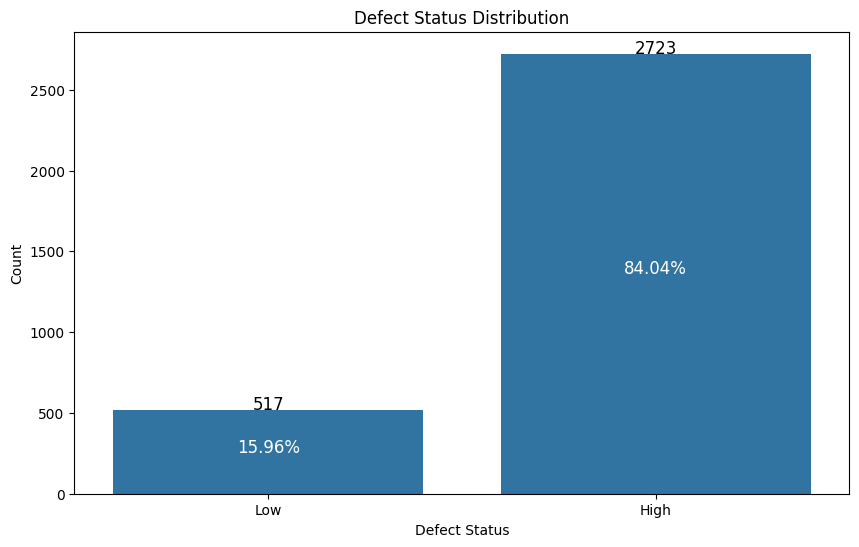

In [9]:
# Grouping
groupedDeffectSt = df.groupby('DefectStatus')['DefectStatus'].value_counts()

# Reset index supaya mempermudah plot
groupedDeffectSt = groupedDeffectSt.reset_index(name='count')

# Buat bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='DefectStatus', y='count', data=groupedDeffectSt)

# sum total count
total = groupedDeffectSt['count'].sum()

# Add value labels on top and percentage labels inside the bars
for p in barplot.patches:
    height = p.get_height()

    # Value label on top of the bar
    barplot.text(
        p.get_x() + p.get_width() / 2., height + 3,
        f'{int(height)}', ha='center', size=12
    )
    # Percentage label inside the bar
    barplot.text(
        p.get_x() + p.get_width() / 2., height / 2,
        f'{height / total:.2%}', ha='center', size=12, color='white'
    )

# Show the plot
plt.xticks(ticks=[0,1],labels=['Low','High'])
plt.title('Defect Status Distribution')
plt.xlabel('Defect Status')
plt.ylabel('Count')
plt.show()

Sebagian besar datanya adalah high defect, yang artinya barang cacat lebih banyak daripada barang tidak cacat. Hal ini menyebabkan data imbalance, karena pembagiannya adalah 16% pada kelas 0 (low) dan 84% pada kelas 1 (high).

<Axes: xlabel='SupplierQuality', ylabel='Count'>

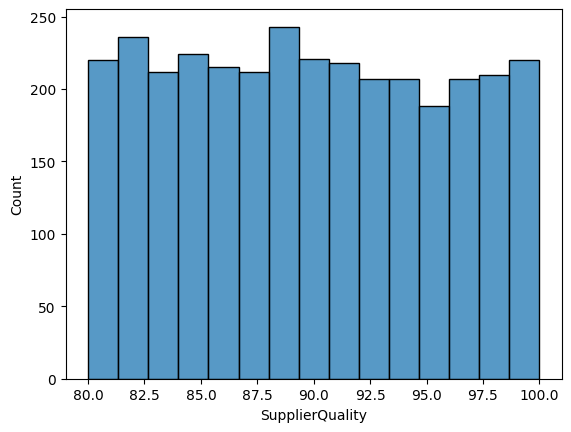

In [10]:
# Pengecekan distribusi dari kolom supplier rating
sns.histplot(df['SupplierQuality'])

Pada supplier quality, minimal quality yang diberikan supplier adalah 80.0 dan maksimal adalah 100.0. Dari grafik, terbanyaknya adalah ada di rentang 87.8 hinggak 89.

<Axes: xlabel='MaintenanceHours', ylabel='Count'>

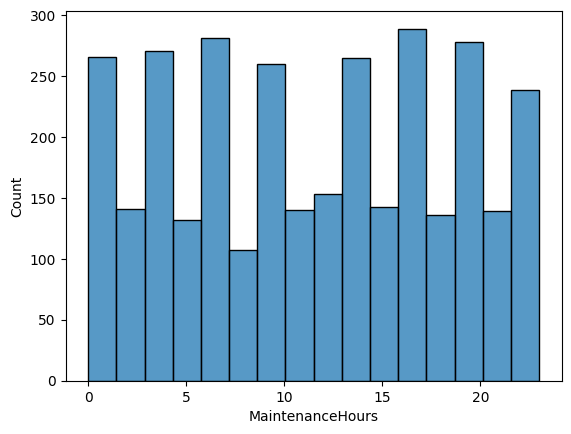

In [11]:
# Cek distribusi MaintenanceHours
sns.histplot(df['MaintenanceHours'])

Maintenace hours adalah jumlah total jam untuk maintenance suatu item pada 1 minggu terakhir. Rentangnya adalah dari 0 jam hingga 24 jam. Berdasarkan grafik di atas dapat diketahui bahwa maintenace hours terbanyak untuk seluruh item adalah 16 jam dalam seminggu.

<Axes: xlabel='DeliveryDelay', ylabel='Count'>

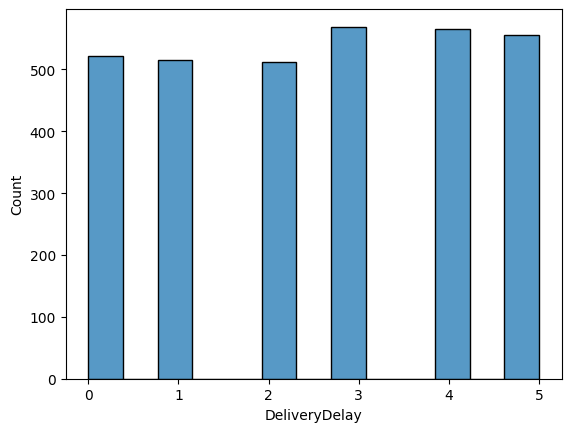

In [12]:
# cek jumlah delivery delay
sns.histplot(df['DeliveryDelay'])

Pada pengecekan delivery delay dapat dilihat bahwa delivery delay memiliki nilai dari 0 hingga 5 hari. Terbanyaknya adalah 5 hari.

In [13]:
# cek safety incident
groupedSFt = df.groupby('DefectStatus')['SafetyIncidents'].value_counts()

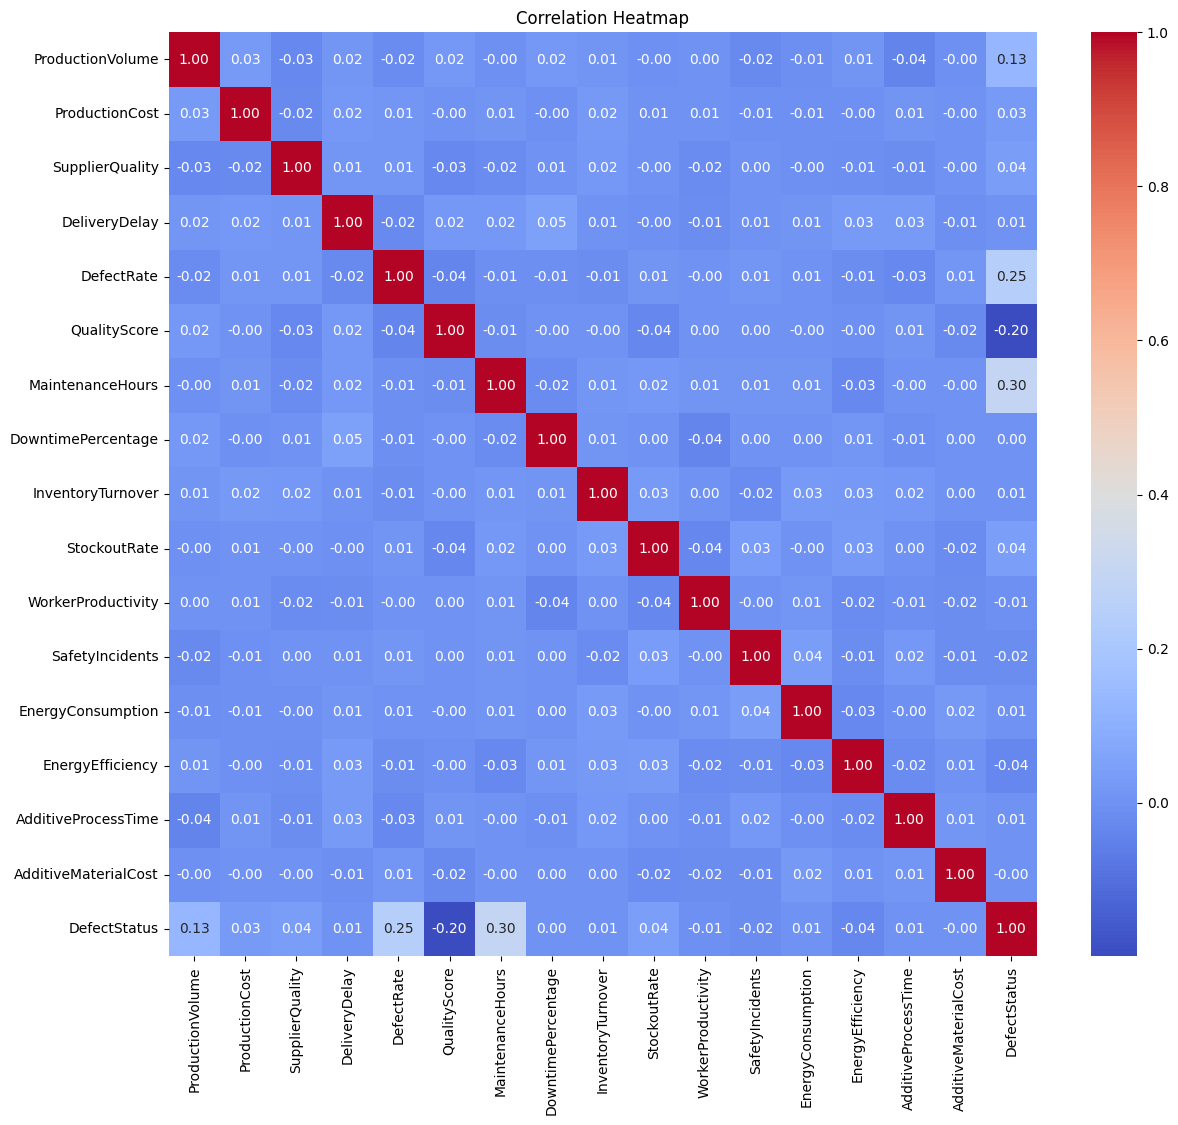

In [14]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Jika dilihat hasil correlationnya menggunakan heatmap dapat disimpulkan bahwa fitur yang memiliki korelasi dengan target (DefectStatus) atau kita sebut dengan fitur importance adalah fitur ProductionVolume, DefectRate, MaintenanceHours dan QualityScore. Untuk lebih lanjutnya dalam pemilihan fitur important, nantinya akan dilakukan pada tahap feature selection. Selanjutnya dengan didapatkannya fitur importance pada proses pengecekan korelasi dengan heatmap, maka saya akan membuat pairplot berdasarkan fitur important.

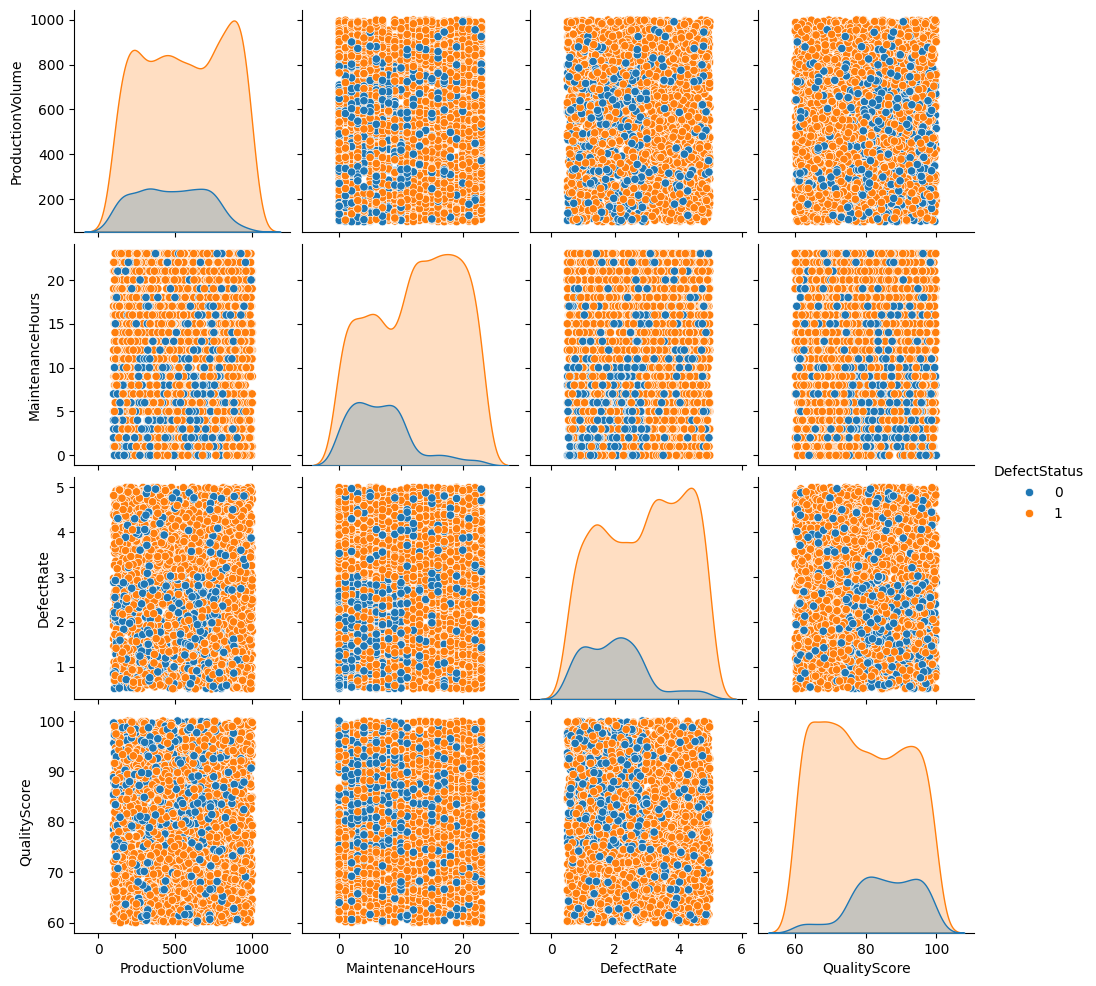

In [15]:
# Pengecekan menggunakan pairplot
selected_features = ['ProductionVolume', 'MaintenanceHours', 'DefectRate', 'QualityScore', 'DefectStatus']
sns.pairplot(df[selected_features], hue='DefectStatus')
plt.show()

Dapat dilihat dari pairplot di atas, semuanya didominasi oleh DefectStatus 1 atau barang defect dengan keterangan 1 adalah high defect. Jika dilihat dari grafik pairplot di atas, kecenderungan tingginya defect rate terjadi ketika maintenance hours pada nilai tengah atau kebawah.

**Kesimpulan EDA**

Berdasarkan target yaitu DefectStatus, dataset memiliki kecenderungan imbalance karena pembagian keduanya adalah 86% dan 14%. Hal ini tentu akan mempengaruhi model machine learning untuk mempelajari data, yang dapat menyebabkan model akan menjadi bias.

Ada kemungkinan feature importance adalah fitur yang akan didapatkan setelah proses feature selection. Fitur importance itu diantaranya adalah:
- Production Volume
- Maintenance Hours
- Defect Rate.
- Quality Score

# V. Feature Engineering

## Split Train-Test

Split Train-Test adalah pemisahan antara data train dengan data test, yang pembagiannya adalah 80% data train dan 20% data test. Proses ini memiliki kerandoman jadi random_state harus diset, dan juga karena data imbalance maka harus didefin stratify terhadap y atau target. Pada penelitian klasifikasi kali ini yang menjadi target adalah DefectStatus, maka pada fitur akan dihilangkan DefectStatus, sedangkan pada target hanya akan berisi DefectStatus.

In [16]:
# Define split train-test
X = df.drop('DefectStatus',axis=1) #Feature
y = df['DefectStatus'] #Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16,stratify=y)

In [17]:
# Check size train and test
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (2592, 16)
X test shape: (648, 16)
y train shape: (2592,)
y test shape: (648,)


## Handling Missing Values

In [18]:
# Cek missing values train
X_train.isna().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
dtype: int64

In [19]:
# Cek missing value test
X_test.isna().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
dtype: int64

In [20]:
# Cek missing value target
y_train.isna().sum()

0

In [21]:
# Cek missing value target test
y_test.isna().sum()

0

Setelah dilakukan pengeekan missing value, didapatkan bahwa dataset tidak memiliki missing value. Maka selanjutnya dilakukan handling outlier.

## Handling Outlier

In [22]:
# buat fungsi diagnostic
def diagnostic_plots(num,kolom):
    # Define figure size
    plt.figure(figsize=(16,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(num[kolom],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=num[kolom])
    plt.title('Boxplot')

    plt.show()

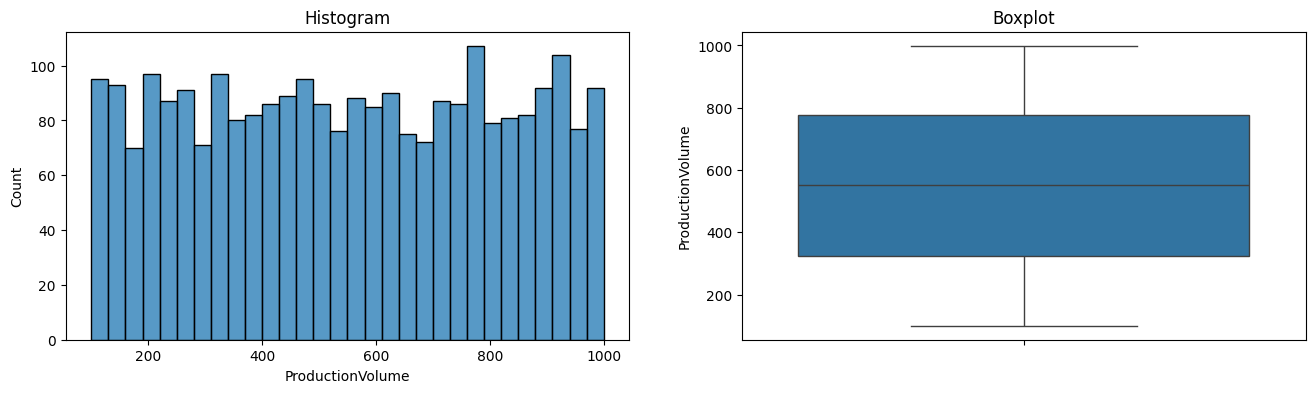

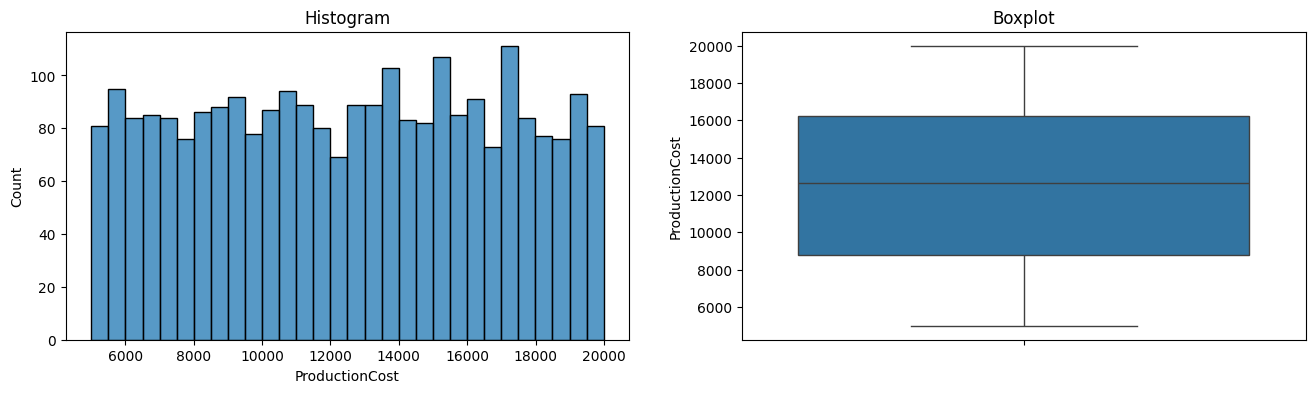

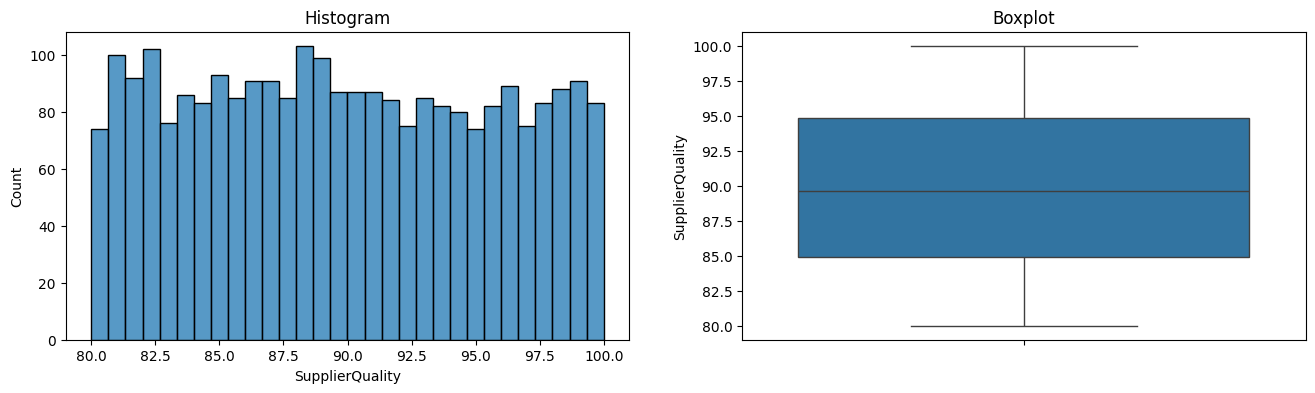

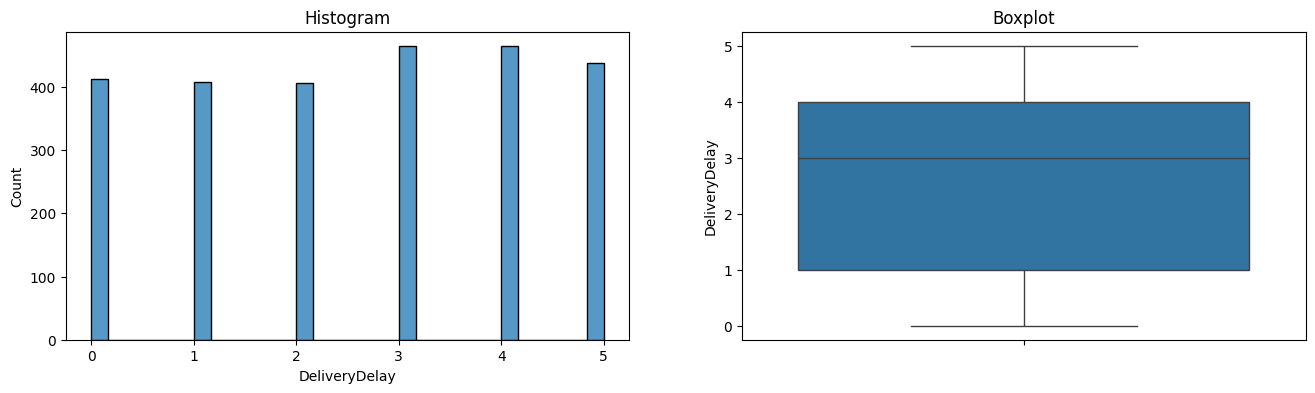

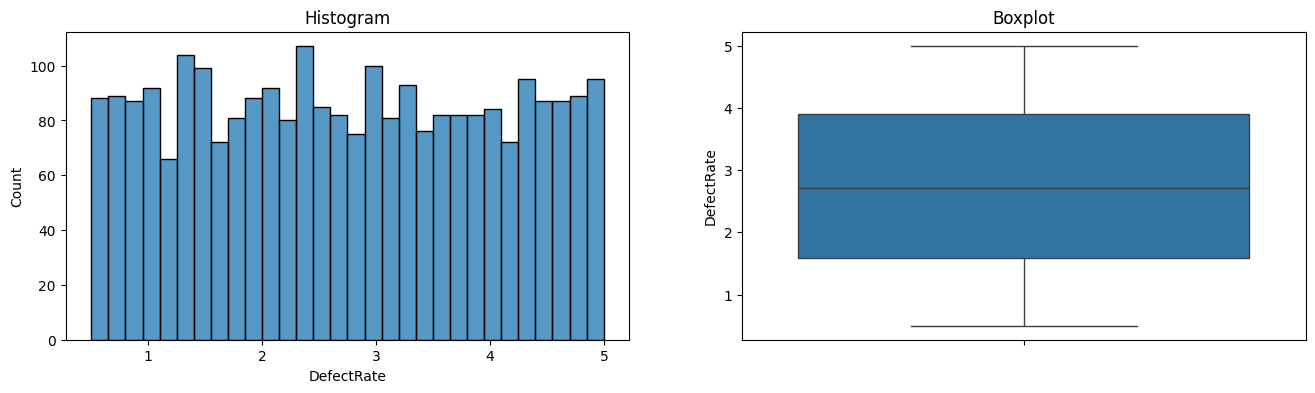

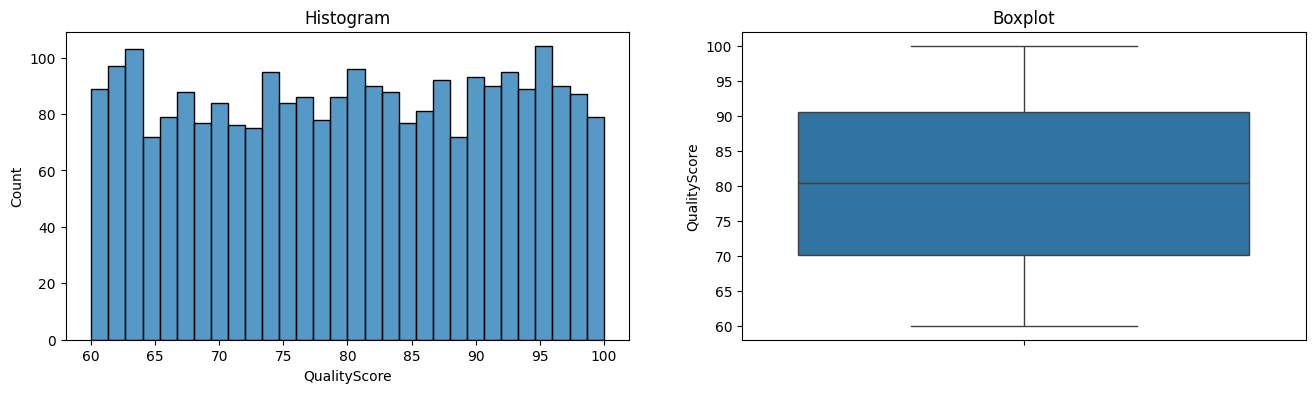

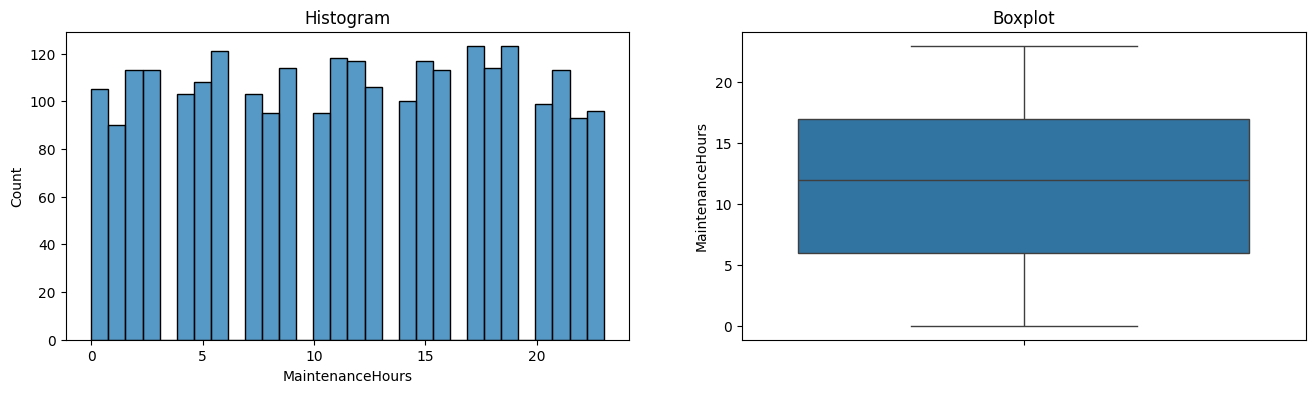

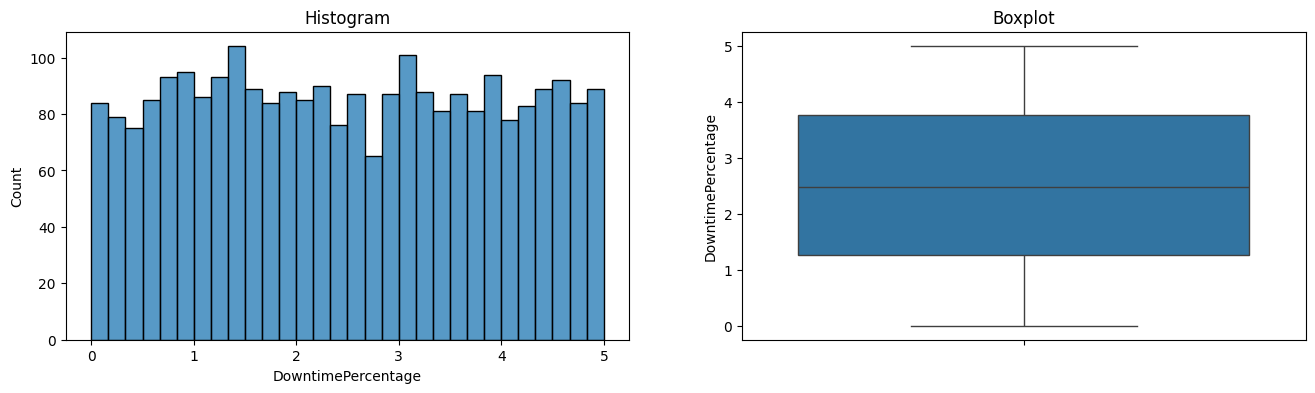

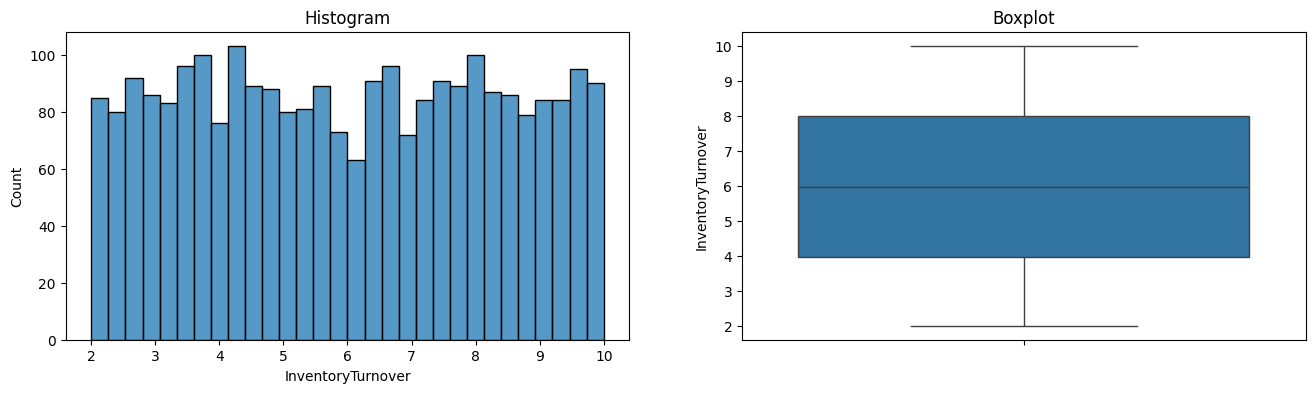

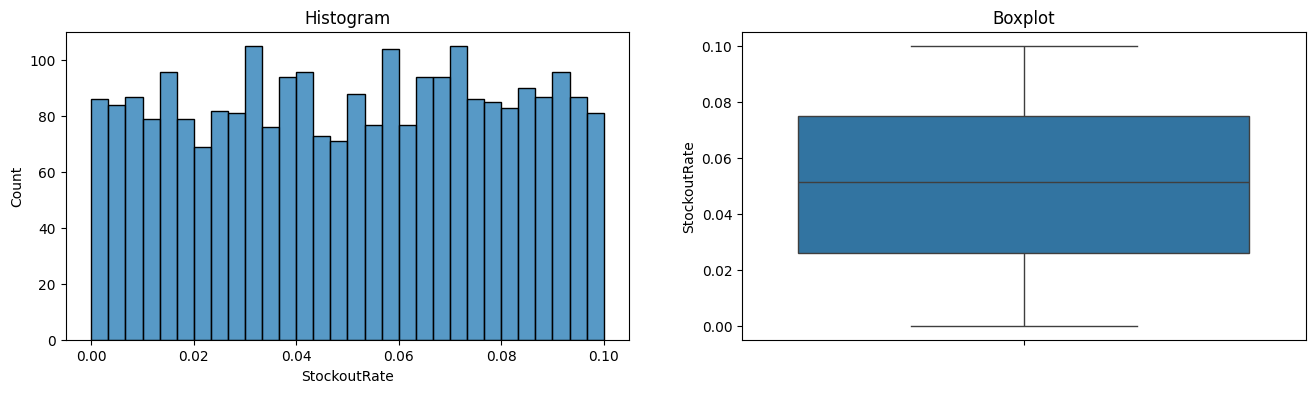

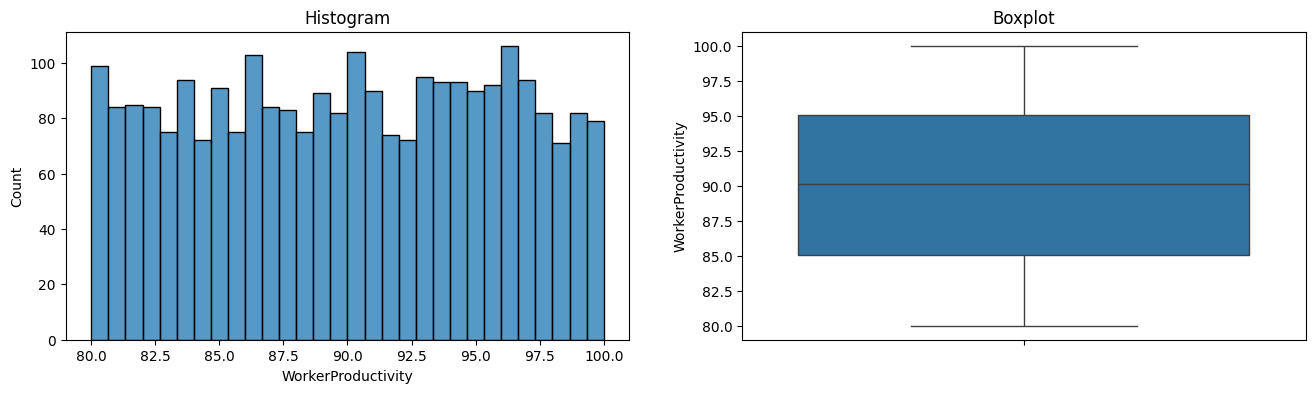

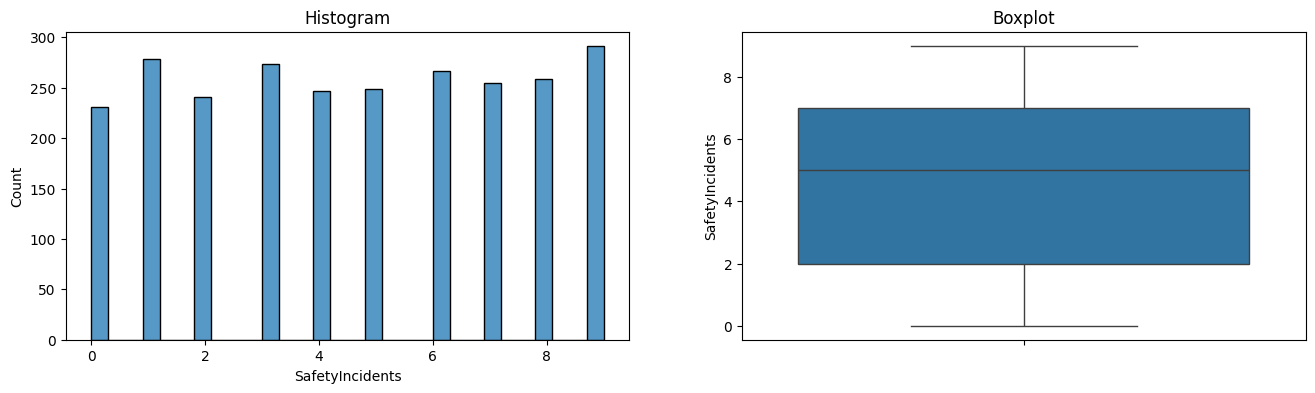

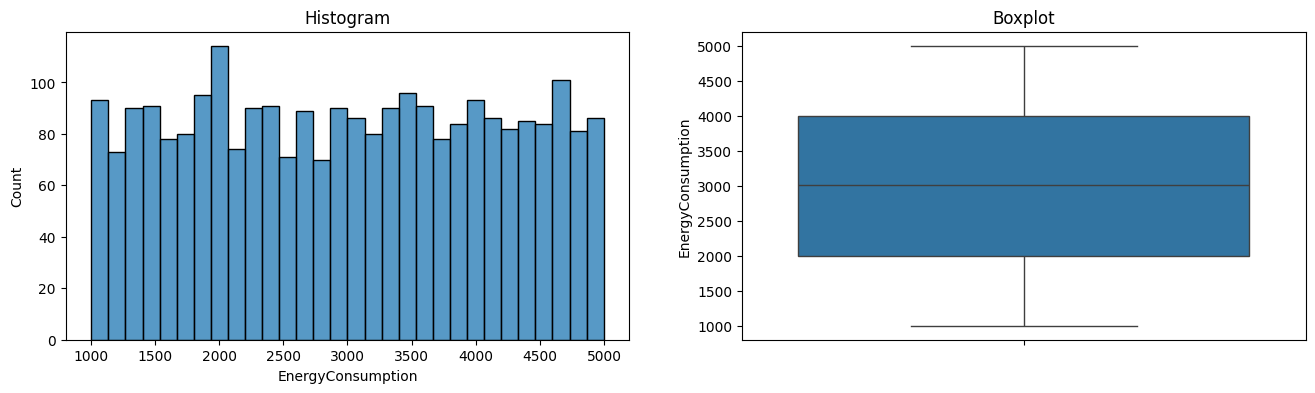

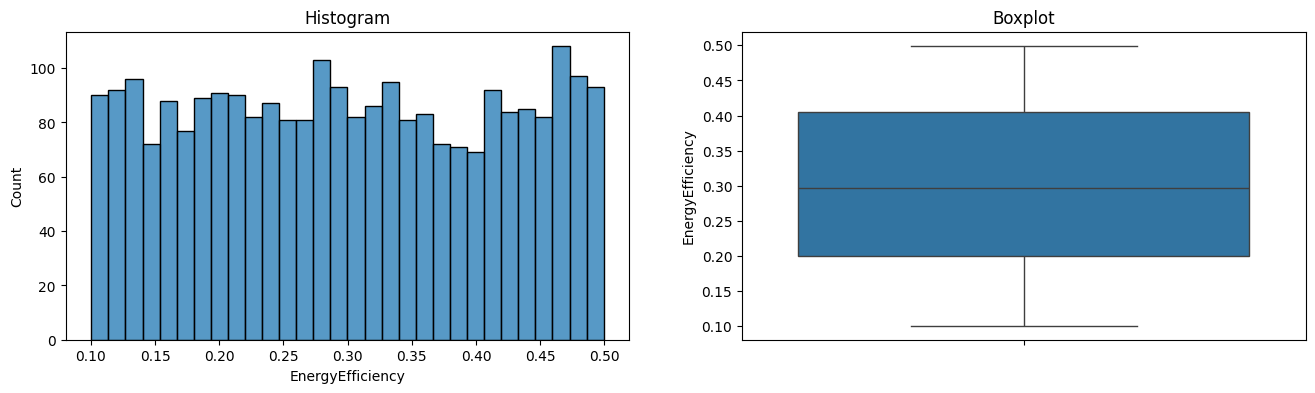

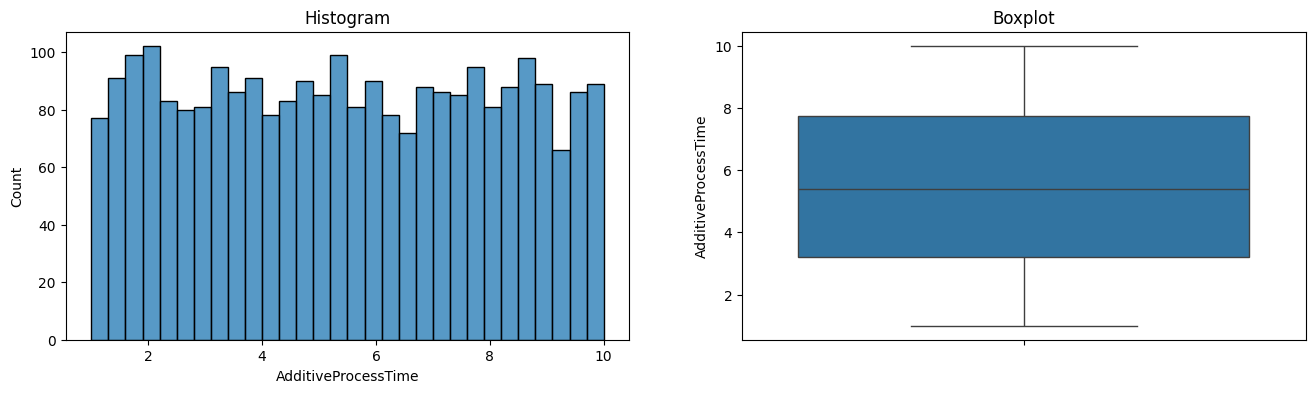

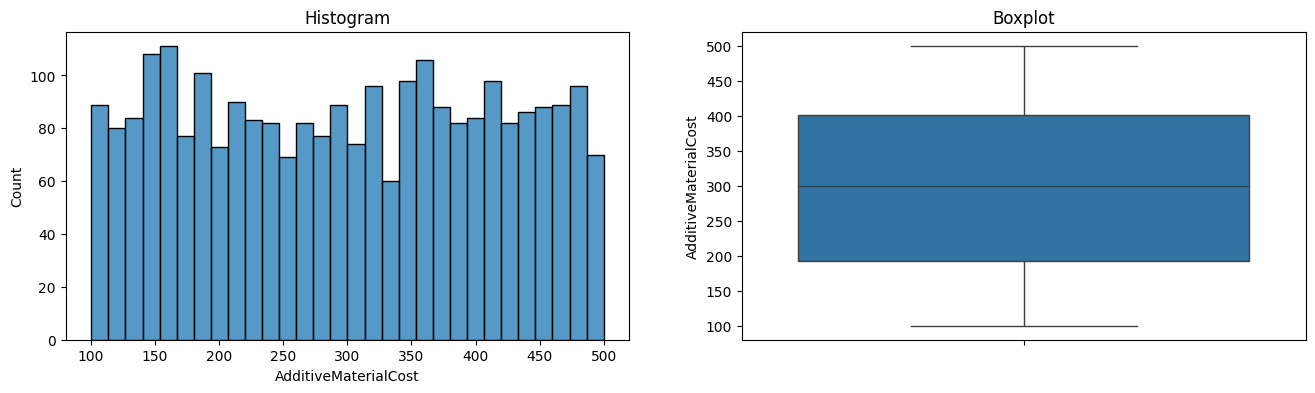

In [23]:
# looping function
for col in X_train.columns:
    diagnostic_plots(X_train, col)

In [24]:
# Pengecekan jumlah outlier menggunakan IQR
for k in X_train:
    Q3 = X_train[k].quantile(.75)
    Q1 = X_train[k].quantile(.25)

    IQR = Q3-Q1

    # Karena data highly skew, maka menggunakan fold 3
    upperBound = Q3 + (3 * IQR)
    lowerBound = Q1 - (3 * IQR)

    outlier = X_train[(X_train[k]>upperBound) | (X_train[k]<lowerBound)]

    print(k)
    print('Count of outliers:', outlier.shape[0])
    print('Percent of outliers:', (outlier.shape[0] / X_train.shape[0]) * 100, '%')
    print('=' * 60)

ProductionVolume
Count of outliers: 0
Percent of outliers: 0.0 %
ProductionCost
Count of outliers: 0
Percent of outliers: 0.0 %
SupplierQuality
Count of outliers: 0
Percent of outliers: 0.0 %
DeliveryDelay
Count of outliers: 0
Percent of outliers: 0.0 %
DefectRate
Count of outliers: 0
Percent of outliers: 0.0 %
QualityScore
Count of outliers: 0
Percent of outliers: 0.0 %
MaintenanceHours
Count of outliers: 0
Percent of outliers: 0.0 %
DowntimePercentage
Count of outliers: 0
Percent of outliers: 0.0 %
InventoryTurnover
Count of outliers: 0
Percent of outliers: 0.0 %
StockoutRate
Count of outliers: 0
Percent of outliers: 0.0 %
WorkerProductivity
Count of outliers: 0
Percent of outliers: 0.0 %
SafetyIncidents
Count of outliers: 0
Percent of outliers: 0.0 %
EnergyConsumption
Count of outliers: 0
Percent of outliers: 0.0 %
EnergyEfficiency
Count of outliers: 0
Percent of outliers: 0.0 %
AdditiveProcessTime
Count of outliers: 0
Percent of outliers: 0.0 %
AdditiveMaterialCost
Count of outlier

Setelah dilakukan pengecekan outlier, data sudah bersih dari outlier, maka proses handling outlier bisa dilewatkan. Selanjutnya adalah proses pengecekan cardinality, karena dataset hanya terdiri dari angka, jadi pengecekan ini dilakukan untuk menentukan kolom mana yang menjadi kategori.

Pada umumnya, data yang memiliki low cardinality adalah data yang kategorikal, sedangkan yang high cardinality adalah data yang numerikal. Namun selanjutnya penamaan akan menggunakan low_cardinality dan high_cardinality.

In [25]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []
    
    for column in column_names:
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)        
        unique_values.append(sorted(dataframe[column].unique().tolist()))
        
        if unique_count > 30:
            cardinality_status.append("high")
        else:
            cardinality_status.append("low")
        
    data = {'column_names': column_names, 
            'total_unique_counts': unique_counts,
            'unique_values': unique_values,
            'cardinality_status': cardinality_status}
    
    print('Columns Cardinality Checking Table')
    display(pd.DataFrame(data=data))

In [26]:
# cek
check_column_cardinality(X_train)

Columns Cardinality Checking Table


,column_names,total_unique_counts,unique_values,cardinality_status
0,ProductionVolume,841,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",high
1,ProductionCost,2592,"[5000.174521330492, 5000.460782680736, 5002.02...",high
2,SupplierQuality,2592,"[80.00482009370269, 80.00485868869025, 80.0080...",high
3,DeliveryDelay,6,"[0, 1, 2, 3, 4, 5]",low
4,DefectRate,2592,"[0.5007098506012553, 0.5054162625905806, 0.506...",high
5,QualityScore,2592,"[60.01320637037906, 60.02216738341016, 60.0527...",high
6,MaintenanceHours,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",low
7,DowntimePercentage,2592,"[0.0016648394255397, 0.0051465778268333, 0.006...",high
8,InventoryTurnover,2592,"[2.0016111850744838, 2.003592225054806, 2.0059...",high
9,StockoutRate,2592,"[2.0517960894972377e-06, 6.747294865960818e-05...",high


Setelah dilakukan pengecekan cardinality, pengecekan correlation selanjutnya untuk high_cardinality akan digunakan spearman korelasi karena ini adalah korelasi antara fitur dan target yang dimana fitur adalah numerik kontinus dan target adalah numerik discrete, sedangkan untuk low_cardinality akan digunakan kendaltau korelasi karena ini adalah korelasi antara kategori dengan kategori.

## Feature Selection

In [27]:
# Variable memisahkan high dan low cardinality
high_cardinality = X_train.drop(columns=['DeliveryDelay','MaintenanceHours','SafetyIncidents'])
low_cardinality = X_train[['DeliveryDelay','MaintenanceHours','SafetyIncidents']]

In [28]:
# cek
high_cardinality

,ProductionVolume,ProductionCost,SupplierQuality,DefectRate,QualityScore,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
662,517,9181.398086,94.748629,1.775290,81.863771,1.771201,8.627185,0.076756,90.145151,3797.516761,0.132106,6.572673,306.110040
1862,847,18929.458432,82.529285,4.813323,95.351098,4.508597,4.285757,0.064375,83.387812,4311.133408,0.150105,7.477779,308.383985
1404,309,13410.174424,98.302776,3.604286,66.769904,0.017459,8.301401,0.093126,84.683811,3223.780626,0.238771,3.636576,190.974556
1414,904,12276.419900,94.543256,0.908772,64.707061,1.765946,8.156708,0.008545,89.157698,4131.337853,0.299231,1.624604,354.338419
834,914,9677.957869,84.241625,3.961341,66.237050,0.350549,8.385408,0.071346,95.477496,1843.587904,0.468389,4.640604,175.541518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,157,5350.281445,82.113007,3.732987,99.476147,1.531752,4.531700,0.047806,83.441882,2605.461553,0.153057,1.835613,311.832180
874,747,13167.234992,82.998185,1.162732,81.289394,0.951805,4.333472,0.020010,84.191958,2036.661409,0.191436,4.437707,310.339712
2856,248,18810.371012,80.771831,3.799422,76.924728,2.272717,8.385219,0.083340,95.403964,2168.381398,0.477052,7.866107,203.881304
712,711,14607.140633,81.132511,2.581224,70.486556,1.646857,2.748125,0.023966,98.304622,4984.416354,0.453981,4.445777,455.811694


In [29]:
# cek
low_cardinality

,DeliveryDelay,MaintenanceHours,SafetyIncidents
662,1,6,0
1862,4,17,3
1404,0,14,9
1414,3,3,5
834,1,16,7
...,...,...,...
558,4,5,3
874,0,8,1
2856,2,1,2
712,2,14,9


Dataset sudah berhasil dibagi antara high_cardinality atau low_cardinality.

In [30]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filter the data distribution into either normally distributed or skewed columns
for num in X_train.columns:
    skewness = X_train[num].skew()

    # If the data is normally distributed
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # If the data has low negative skewness
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has low positive skewness
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has moderate negative skewness
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # If the data has moderate positive skewness
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])


In [31]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,ProductionVolume,-0.001577
1,ProductionCost,-0.023838
2,SupplierQuality,0.056473
3,DeliveryDelay,-0.073968
4,DefectRate,0.021886
5,QualityScore,-0.038035
6,MaintenanceHours,-0.027163
7,DowntimePercentage,0.015988
8,InventoryTurnover,0.011848
9,StockoutRate,-0.038532


In [32]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate


Dilakukan pengecekan normality dari persebaran datanya, diketahui bahwa keseluruhan data itu terdistribusi normal. Hal ini dilakukan untuk memastikan apakah data tanpa outlier itu memiliki distribusi yang normal atau tidak, dari pembuktian ini dapat terbukti bahwa data terdistribusi normal. Hal ini juga sebagai pertimbangan dalam menentukan korelasi antara spearman atau pearson. Namun pada kasus ini yang dapat digunakan adalah spearman, karena hubungan antara numerik discrete dengan numerik kontinous. Dimana pearson adalah hubungan antara kontinus dengan kontinus.

In [33]:
#Finding the correlation between numerical columns and Y Train using pearsonr
p_values = []
interpretation = []
cols = []
corr = []
selected_highcard_cols = []

for col in high_cardinality.columns:
    #For Skewed Columns
    corr_coef, p_value = spearmanr(high_cardinality[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if ((-0.1 > corr_coef) or (corr_coef > 0.1)):
        interpretation.append('Correlated')
        selected_highcard_cols.append(col)
    else :
        interpretation.append('Not Correlated')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,ProductionVolume,0.118275,1.542293e-09,Correlated
1,ProductionCost,0.035490,7.083406e-02,Not Correlated
2,SupplierQuality,0.032412,9.898975e-02,Not Correlated
3,DefectRate,0.245815,5.603127e-37,Correlated
4,QualityScore,-0.199794,9.552538e-25,Correlated
5,DowntimePercentage,0.004826,8.060023e-01,Not Correlated
6,InventoryTurnover,-0.001820,9.262175e-01,Not Correlated
7,StockoutRate,0.034802,7.648006e-02,Not Correlated
8,WorkerProductivity,0.006162,7.538587e-01,Not Correlated
9,EnergyConsumption,-0.008301,6.727169e-01,Not Correlated


In [34]:
# cek
selected_highcard_cols

['ProductionVolume', 'DefectRate', 'QualityScore']

In [35]:
#Finding the correlation between categorical columns and y_train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_lowcard_cols = []

for col in low_cardinality.columns:
  corr_coef, p_value = kendalltau(low_cardinality[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if ((-0.1 > corr_coef) or (corr_coef > 0.1)):
    interpretation.append('Correlated')
    selected_lowcard_cols.append(col)
  else :
    interpretation.append('Not Correlated')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,DeliveryDelay,-0.004020,8.165734e-01,Not Correlated
1,MaintenanceHours,0.242626,1.123748e-49,Correlated
2,SafetyIncidents,-0.012073,4.730594e-01,Not Correlated


In [36]:
# cek
selected_lowcard_cols

['MaintenanceHours']

In [37]:
# membuat X_train_final berdasarkan kolom yang terpilih setelah proses feature selection
selected_final = selected_lowcard_cols+selected_highcard_cols
X_train_final = X_train[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

,MaintenanceHours,ProductionVolume,DefectRate,QualityScore
662,6,517,1.775290,81.863771
1862,17,847,4.813323,95.351098
1404,14,309,3.604286,66.769904
1414,3,904,0.908772,64.707061
834,16,914,3.961341,66.237050


,MaintenanceHours,ProductionVolume,DefectRate,QualityScore
782,14,756,3.688152,82.666698
3185,5,958,1.181036,63.326469
1817,20,251,3.478630,82.036506
856,0,665,3.222822,74.773207
648,23,111,4.731806,84.522081


## Balancing Using SMOTENC

Proses balancing dilakukan dengan tujuan agar model dapat mempelajari dataset secara lebih detail dan baik. Pada proses balancing terdapat 2 metode yaitu undersampling atau oversampling.

- Undersampling = Memotong data ke arah data minority supaya tercipta kestabilan.
- Oversampling = Membuat data sintesis supaya data minority akan sama dengan data majority

Pertimbangan dalam menentukan untuk menggunakan balancing adalah ketika data imbalance, menurut saya data dapat dikatakan imbalance jika pembagiannya adalah 70% - 30%. Pada dataset yang saya teliti, pembagian adalah 84% - 16% jadi dataset dapat dikategorikan sebagai imbalance.

Selain itu dalam menggunakan metode sampling, menurut saya pertimbangannya adalah, gunakan undersampling jika baris yang dihasilkan setelah proses adalah 2000 baris. Jika tidak maka lakukan oversampling. Karena jika dibawah 2000 baris, dikhawatirkan model tidak dapat belajar dengan baik.

Pada dataset saya, 14% itu hanya mendapatkan 500an baris, maka saya memutuskan untuk menggunakan oversampling. Oversampling yang saya gunakan adalah SMOTENC, karena ada indikasi bahwa data memiliki kolom kategorikal yang explicit dalam bentuk yang sudha ordinal.

([<matplotlib.patches.Wedge at 0x1eaa6ee1310>,
 [Text(0.5260360519233906, 0.28859326408780195, '0'),
  Text(-0.5260360384133644, -0.2885932887133265, '1')],
 [Text(1.095908441507064, 0.6012359668495875, '16.0%'),
  Text(-1.0959084133611758, -0.6012360181527636, '84.0%')])

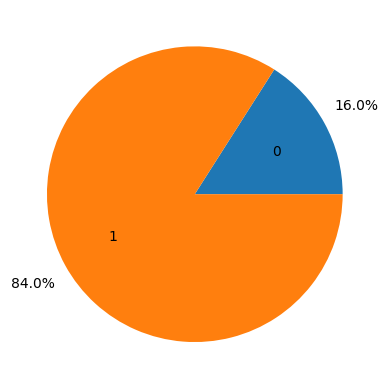

In [38]:
# Plot class imbalance
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

# Using pie plot for comparation
fig, ax = plt.subplots()
ax.pie(counts_elements, labels=unique_elements, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)

Dapat dilihat bahwa data sangatlah imbalance antara kelas 1 dan kelas 0

### Define SMOTENC

In [39]:
# inisiasi
smotenc = SMOTENC(random_state=16, categorical_features=[0])

Random state diset supaya tidak berubah setiap kali kode dijalankan. Pada kolom X_train_final, kategorikal features terdapat pada index ke-0.

###  Fit SMOTENC

In [40]:
# fit ke data train
X_train_finalResample, y_train_resample = smotenc.fit_resample(X_train_final,y_train)

([<matplotlib.patches.Wedge at 0x1eaa6f902e0>,
 [Text(3.6739403974420595e-17, 0.6, '0'),
  Text(-1.1021821192326178e-16, -0.6, '1')],
 [Text(7.654042494670958e-17, 1.25, '50.0%'),
  Text(-2.296212748401287e-16, -1.25, '50.0%')])

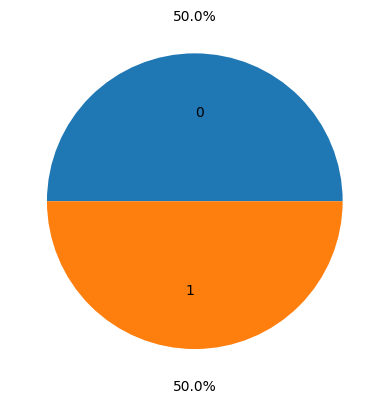

In [41]:
# Plot the data after balancing
unique_elements_resample, counts_elements_resample = np.unique(y_train_resample, return_counts=True)

# Using pie plot for comparation
fig, ax = plt.subplots()
ax.pie(counts_elements_resample, labels=unique_elements_resample, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

Setelah dilakukan pengecekan, data sudah berhasil dibalancing dengan kelas 1 yaitu 50% dan kelas 0 50% dengan menggunakan metode oversampling, artinya ada data sintetis baru yang dimasukkan ke dalam dataset. Namun sebaiknya memang menggunakan sample asli, karena keterbatasan waktu dalam mencari sample asli dan saya hanya melakukan penelitian berdasarkan data yang disediakan di kaggle. Maka proses saya lakukan menggunakan oversampling.

## Scaling

In [42]:
# Pengecekan skew
X_train_finalResample[selected_highcard_cols].skew()

ProductionVolume    0.074369
DefectRate          0.446799
QualityScore       -0.325991
dtype: float64

Nilai skew jika diantara -0.5 < skew < 0.5 artinya data terdistribusi normal. Dari hasil didapatkan bahwa data terdistribusi normal, maka scaling akan dilakukan menggunakan StandardScaler.

In [43]:
# Scaler
scaler = StandardScaler()
scaler

StandardScaler()

## Encoding

Encoding yang akan dilakukan adalah encoding terhadap kolom kategori yaitu kolom MaintenanceHours. Proses encoding bisa diskip karena pada kasus ini, kolom tersebut sudah berbentuk angka dan sudah dalam bentuk OrdinalEncoded. Karena perbedaan maintenance hours tiap item dalam seminggu dapat dikatakan memiliki hierarchy atau adanya perbedaan perlakuan antara item yang dimaintenance lebih jarang dengan item yang dimaintenance lebih sering.

## Column Transformer

In [44]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('cat', 'passthrough', selected_lowcard_cols),
    ('num', scaler, selected_highcard_cols)
    ], remainder='drop'
    )

transformer

ColumnTransformer(transformers=[('cat', 'passthrough', ['MaintenanceHours']),
                                ('num', StandardScaler(),
                                 ['ProductionVolume', 'DefectRate',
                                  'QualityScore'])])

Pada kolom transformer, untuk data dengan selected_lowcard_cols akan dimasukkan kedalam 'cat' dengan proses passthrough karena data tidak di encode. Sedangkan untuk selected_highcard_cols akan dimasukkan kedalam 'num' dengan proses scaler. Lalu sisanya untuk kolom yang tidak diproses akan didrop.

# VI. Model Definition

Dalam penyelesaian project ini akan dilakukan proses pengetesan terhadap 5 algoritma menggunakan pipeline guna mengevaluasi performa kelima model itu dengan dataset yang sudah disiapkan. Model klasifikasi yang digunakan adalah:

1. **K-Nearest Neighbor (KNN) Classifier**: Sebuah klasifikasi simple yang mengklasifikasi berdasarkan kelas majority yang saling bertetangga atau berdekatan.

2. **Support Vector Classification (SVC)**: Sebuah metode klasifikasi yang bersifat robust pada outlier yang menggunakan konsep hyperplane untuk memisahkan kelas, model ini efektif untuk data linear ataupun tidak linear.

3. **Decision Tree Classifier**: Model prediksi yang berbasis pohon untuk membuat keputusan berdasarkan fitur input. Pada setiap node dalam pohon, keputusan dibuat berdasarkan fitur tertentu yang memaksimalkan pemisahan antara kelas-kelas (misalnya, menggunakan impurity measures seperti Gini impurity atau entropy).

4. **Random Forest Classifier**: Model ensemble method yang membangun beberapa decision tree pada sub-sampel dari dataset dan menggabungkan hasilnya (misalnya, melalui voting) untuk meningkatkan akurasi prediksi dan mengontrol overfitting.

5. **XGBoost (XGB) Classifier**: Sebuah metode boosting yang sangat dioptimalkan dan digunakan untuk masalah klasifikasi dan regresi. XGBoost membangun model secara bertahap, dan setiap model baru mencoba untuk memperbaiki kesalahan dari model sebelumnya dengan meminimalkan fungsi loss melalui gradien descent.

## Pembuatan Pipeline

### 1. KNN

In [45]:
# Define model
knn = KNeighborsClassifier()

# Define pipe
knn_pipe = Pipeline([
    ('transformer',transformer),
    ('knn',knn)
])
knn_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('knn', KNeighborsClassifier())])

### 2. SVM

In [46]:
#  Define model
svm = SVC()

# Define pipe
svm_pipe = Pipeline([
    ('transformer',transformer),
    ('svm',svm)
])
svm_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('svm', SVC())])

### 3. Decision Tree

In [47]:
# Define Model
dTree = DecisionTreeClassifier()

# Define pipe
dTree_pipe = Pipeline([
    ('transformer',transformer),
    ('dTree',dTree)
])

dTree_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('dTree', DecisionTreeClassifier())])

### 4. Random Forest

In [48]:
# Define model
rfc = RandomForestClassifier(random_state=16)

# Define pipe
rfc_pipe = Pipeline([
    ('transformer',transformer),
    ('rfc',rfc)
])
rfc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('rfc', RandomForestClassifier(random_state=16))])

### 5. XGBoost

In [49]:
# Define model
xgbc = XGBClassifier()

# Define pipe
xgbc_pipe = Pipeline([
    ('transformer',transformer),
    ('xgbc',xgbc)
])
xgbc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('xgbc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Pipeline adalah sebuah metode untuk membuat model melakukan pembelajaran dalam satu kali flow pengerjaan. Jadi dalam konteks ini pipeline dari setiap model yang nantinya akan ditrain ke data train akan melakukan pertama yaitu proses encoding dan scaling, lalu proses penerapan terhadap model yang dipilih. Nama pipeline yang dibuat diantaranya:

1. `knn_pipe`
2. `svm_pipe`
3. `dTree_pipe`
4. `rfc_pipe`
5. `xgbc_pipe`

Adapun keleebihan atau kekurangan dari model yang dipilih yaitu:
| Model | Kelebihan | Kekurangan |
| --- | --- | ---|
| KNN | Mudah diimplementasikan, efektif pada data dengan distribusi baik | Lambat pada dataset besar, sensitif terhadap fitur irrelevan |
| SVM | Efektif pada ruang berdimensi tinggi, kernel trick untuk non-linear data | Waktu komputasi tinggi, tuning parameter yang rumit |
| Decision Tree | Interpretabilitas tinggi, menangani fitur kategorikal dan numerik | Cenderung overfitting, terutama pada pohon yang dalam |
| Random Forest Classifier | Mengontrol overfitting, menangani data yang hilang, stabil | Waktu komputasi dan kebutuhan memori yang lebih tinggi |
| XGBoost Classifier | Performanya superior, menangani missing values, regularisasi | Tuning hyperparameter yang kompleks, sumber daya komputasi besar |

# VII. Model Training

In [50]:
# Fitting KNN to train data
knn_pipe.fit(X_train_finalResample,y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('knn', KNeighborsClassifier())])

In [51]:
# Fitting SVM to train data
svm_pipe.fit(X_train_finalResample,y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('svm', SVC())])

In [52]:
# Fitting Decision Tree to train data
dTree_pipe.fit(X_train_finalResample,y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('dTree', DecisionTreeClassifier())])

In [53]:
# Fitting Random Forest Classifier to train data
rfc_pipe.fit(X_train_finalResample,y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('rfc', RandomForestClassifier(random_state=16))])

In [54]:
# Fitting XGBoost Classifier to train data
xgbc_pipe.fit(X_train_finalResample,y_train_resample)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['MaintenanceHours']),
                                                 ('num', StandardScaler(),
                                                  ['ProductionVolume',
                                                   'DefectRate',
                                                   'QualityScore'])])),
                ('xgbc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Keseluruhan proses fitting masing-masing pipeline ke train data disini adalah fit ke data X_train_finalResample dan y_train_resample. Diharapakan supaya model dapat mempelajari lebih baik menggunakan data yang sudah diresample.

# VIII. Model Evaluation

**Metric yang digunakan adalah Recall**


Penentuan evaluation pada model adalah dicari dengan mempertimbangkan nilai recall atau false negative pada data. Tujuannya adalah mengidentifikasi supaya model tidak salah dalam memprediksi kelas negatif sebagai positif.

Dalam kasus ini:
- `0` = `Low Defect`
- `1` = `High Defect`

Recall adalah metric scorer yang mementingkan nilai true positive dan menekan nilai false negative. Artinya semakin tinggi score recall maka model sudah baik dalam mengidentifikasi class positive, sedangkan semakin kecil recall maka artinya model memprediksi kelas negatif sebagai kelas positif. Dikarenakan kelas 0 adalah kelas yang low defect yang artinya adalah item dari kelas 0 berarti barang yang memiliki sedikit kecacatan.

Maka selanjutnya saya akan terlebih dahulu define kelas `positif` pada `kelas 0` dan kelas `negatif` pada `kelas 1`. Recall digunakan supaya model tidak memprediksi kelas negatif sebagai kelas positif yang dimana dalam kasus ini adalah model memprediksi barang dengan low defect namun aktualnya adalah high defect yang dimana artinya adalah disini false negative.

## Model Evaluation

### KNN Classifier

In [55]:
# Base model Score
train_scoreknn = knn_pipe.score(X_train_finalResample, y_train_resample)
test_scoreknn = knn_pipe.score(X_test_final, y_test)

print('KNN Base Model Score:')
print('Training Score:', train_scoreknn)
print('Testing Score:', test_scoreknn)

KNN Base Model Score:
Training Score: 0.9150596877869606
Testing Score: 0.8487654320987654


KNN Classifier Base Model, menghasilkan sebuah score yang bisa dijadikan sebagai insight terhadap performa modelnya dari training dan testing dataset:

- `Training Score 0.9151`: Artinya model berhasil memprediksi 91,51% dari training data, berarti model sudah baik dalam memprediksi data train.
- `Testing Score 0.8487`: Artinya model berhasil memprediksi 84,87% dari testing dengan benar yang mana testing data ini adalah sebuah data baru yang sebelumnya belum dilihat oleh si model.

Karena perbedaannya antara training dan testing sangat besar dan meski nilai antara train dan test sudah besar artinya model sudah memiliki cukup fitur untuk memprediksi, namun dalam hal ini model KNN Classifier termasuk ke dalam overfit, karena nilai train lebih besar daripada nilai test, yang artinya model tidak cukup baik untuk memprediksi sesuatu yang baru yang sebelumnya belum pernah dilihat.

In [56]:
# Predict using base model
y_train_predknn = knn_pipe.predict(X_train_finalResample)
y_test_predknn = knn_pipe.predict(X_test_final)

print('KNN train evaluation score')
print(classification_report(y_train_resample, y_train_predknn))
print('KNN test evaluation score')
print(classification_report(y_test, y_test_predknn))

KNN train evaluation score
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2178
           1       0.92      0.91      0.91      2178

    accuracy                           0.92      4356
   macro avg       0.92      0.92      0.92      4356
weighted avg       0.92      0.92      0.92      4356

KNN test evaluation score
              precision    recall  f1-score   support

           0       0.52      0.83      0.63       103
           1       0.96      0.85      0.90       545

    accuracy                           0.85       648
   macro avg       0.74      0.84      0.77       648
weighted avg       0.89      0.85      0.86       648



**Nilai Positif: 0**

Dari score metric yang dihasilkan kita akan memfokuskan kepada score yang terdapat pada kelas 0, karena kelas ini adalah kelas positif dari dataset yang saya teliti. Namun penelitian ini memfokuskan kepada nilai recall, sehingga yang akan saya lihat hanya nilai yang terdapat pada recall saja. Nilai recallnya yaitu:

- `Recall`: Untuk training set dihasilkan nilai recall 0.92 yang artinya adalah model sudah berhasil memprediksi 92% benar terhadap nilai aktual positif. Sedangkan untuk yang testing score terhadap recall kelas positif, model mendapatkan nilai recall adalah 0.83 yang artinya model hanya bisa memprediksi 83% benar terhadap nilai aktual positif(low defect) pada test set.

### SVM

In [57]:
# Base model Score
train_scoresvm = svm_pipe.score(X_train_finalResample, y_train_resample)
test_scoresvm = svm_pipe.score(X_test_final, y_test)

print('SVM Base Model Score:')
print('Training Score:', train_scoresvm)
print('Testing Score:', test_scoresvm)

SVM Base Model Score:
Training Score: 0.8409090909090909
Testing Score: 0.8503086419753086


SVM Classifier Base Model, menghasilkan sebuah score yang bisa dijadikan sebagai insight terhadap performa modelnya dari training dan testing dataset:

- `Training Score 0.8409`: Artinya model berhasil memprediksi 84,09% dari training data, berarti model sudah baik dalam memprediksi data train.
- `Testing Score 0.8503`: Artinya model berhasil memprediksi 85,03% dari testing dengan benar yang mana testing data ini adalah sebuah data baru yang sebelumnya belum dilihat oleh si model.

Karena perbedaannya antara training dan testing tidaklah terlalu besar dan nilai antara train dan test sudah besar artinya model sudah memiliki cukup fitur untuk memprediksi, dalam hal ini model SVM Classifier termasuk ke dalam bestfit, karena nilai train dengan nilai test tidak terlalu jauh berbeda, yang artinya model sudah cukup baik untuk memprediksi sesuatu yang baru yang sebelumnya belum pernah dilihat. Namun karena nilai test lebih tinggi, ada indikasi bahwa terdapat data leaking jika menggunakan base parameter atau sebelum hyperparameter tunning.

In [58]:
# Predict using base model
y_train_predsvm = svm_pipe.predict(X_train_finalResample)
y_test_predsvm = svm_pipe.predict(X_test_final)

print('SVM train evaluation score')
print(classification_report(y_train_resample, y_train_predsvm))
print('SVM test evaluation score')
print(classification_report(y_test, y_test_predsvm))

SVM train evaluation score
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2178
           1       0.83      0.85      0.84      2178

    accuracy                           0.84      4356
   macro avg       0.84      0.84      0.84      4356
weighted avg       0.84      0.84      0.84      4356

SVM test evaluation score
              precision    recall  f1-score   support

           0       0.52      0.79      0.63       103
           1       0.96      0.86      0.91       545

    accuracy                           0.85       648
   macro avg       0.74      0.82      0.77       648
weighted avg       0.89      0.85      0.86       648



**Nilai Positif: 0**

Dari score metric yang dihasilkan kita akan memfokuskan kepada score yang terdapat pada kelas 0, karena kelas ini adalah kelas positif dari dataset yang saya teliti. Namun penelitian ini memfokuskan kepada nilai recall, sehingga yang akan saya lihat hanya nilai yang terdapat pada recall saja. Nilai recallnya yaitu:

- `Recall`: Untuk training set dihasilkan nilai recall 0.83 yang artinya adalah model sudah berhasil memprediksi 83% benar terhadap nilai aktual positif. Sedangkan untuk yang testing score terhadap recall kelas positif, model mendapatkan nilai recall adalah 0.79 yang artinya model hanya bisa memprediksi 79% benar terhadap nilai aktual positif(low defect) pada test set.

### Decision Tree Classifier

In [59]:
# Base model Score
train_scoredt = dTree_pipe.score(X_train_finalResample, y_train_resample)
test_scoredt = dTree_pipe.score(X_test_final, y_test)

print('Decision Tree Base Model Score:')
print('Training Score:', train_scoredt)
print('Testing Score:', test_scoredt)

Decision Tree Base Model Score:
Training Score: 1.0
Testing Score: 0.8935185185185185


Decision Tree Classifier Base Model, menghasilkan sebuah score yang bisa dijadikan sebagai insight terhadap performa modelnya dari training dan testing dataset:

- `Training Score 1.0`: Artinya model berhasil memprediksi 100% dari training data, berarti model sudah sangat baik dalam memprediksi data train.
- `Testing Score 0.8888`: Artinya model berhasil memprediksi 88,88% dari testing dengan benar yang mana testing data ini adalah sebuah data baru yang sebelumnya belum dilihat oleh si model.

Karena perbedaannya antara training dan testing sangat besar dan meski nilai antara train dan test sudah besar artinya model sudah memiliki cukup fitur untuk memprediksi, namun dalam hal ini model Decision Tree Classifier termasuk ke dalam overfit, karena nilai train jauh lebih besar daripada nilai test, yang artinya model tidak cukup baik untuk memprediksi sesuatu yang baru yang sebelumnya belum pernah dilihat.

In [60]:
# Predict using base model
y_train_preddt = dTree_pipe.predict(X_train_finalResample)
y_test_preddt = dTree_pipe.predict(X_test_final)

print('Decision Tree train evaluation score')
print(classification_report(y_train_resample, y_train_preddt))
print('Decision Tree test evaluation score')
print(classification_report(y_test, y_test_preddt))

Decision Tree train evaluation score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2178
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      4356
   macro avg       1.00      1.00      1.00      4356
weighted avg       1.00      1.00      1.00      4356

Decision Tree test evaluation score
              precision    recall  f1-score   support

           0       0.62      0.83      0.71       103
           1       0.96      0.91      0.93       545

    accuracy                           0.89       648
   macro avg       0.79      0.87      0.82       648
weighted avg       0.91      0.89      0.90       648



**Nilai Positif: 0**

Dari score metric yang dihasilkan kita akan memfokuskan kepada score yang terdapat pada kelas 0, karena kelas ini adalah kelas positif dari dataset yang saya teliti. Namun penelitian ini memfokuskan kepada nilai recall, sehingga yang akan saya lihat hanya nilai yang terdapat pada recall saja. Nilai recallnya yaitu:

- `Recall`: Untuk training set dihasilkan nilai recall 1.0 yang artinya adalah model sudah berhasil memprediksi 100% benar terhadap nilai aktual positif. Sedangkan untuk yang testing score terhadap recall kelas positif, model mendapatkan nilai recall adalah 0.83 yang artinya model hanya bisa memprediksi 83% benar terhadap nilai aktual positif(low defect) pada test set.

### Random Forest Classifier

In [61]:
# Base model Score
train_scorerfc = rfc_pipe.score(X_train_finalResample, y_train_resample)
test_scorerfc = rfc_pipe.score(X_test_final, y_test)

print('Random Forest Base Model Score:')
print('Training Score:', train_scorerfc)
print('Testing Score:', test_scorerfc)

Random Forest Base Model Score:
Training Score: 1.0
Testing Score: 0.9537037037037037


Random Forest Classifier Base Model, menghasilkan sebuah score yang bisa dijadikan sebagai insight terhadap performa modelnya dari training dan testing dataset:

- `Training Score 1.0`: Artinya model berhasil memprediksi 100% dari training data, berarti model sudah sangat baik dalam memprediksi data train.
- `Testing Score 0.9537`: Artinya model berhasil memprediksi 95,37% dari testing dengan benar yang mana testing data ini adalah sebuah data baru yang sebelumnya belum dilihat oleh si model.

Karena perbedaannya antara training dan testing sangat besar dan meski nilai antara train dan test sudah besar artinya model sudah memiliki cukup fitur untuk memprediksi, namun dalam hal ini model Random Forest Classifier termasuk ke dalam overfit, karena nilai train lebih besar daripada nilai test, yang artinya model tidak cukup baik untuk memprediksi sesuatu yang baru yang sebelumnya belum pernah dilihat.

In [62]:
# Predict using base model
y_train_predrfc = rfc_pipe.predict(X_train_finalResample)
y_test_predrfc = rfc_pipe.predict(X_test_final)

print('Random Forest train evaluation score')
print(classification_report(y_train_resample, y_train_predrfc))
print('Random Forest test evaluation score')
print(classification_report(y_test, y_test_predrfc))

Random Forest train evaluation score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2178
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      4356
   macro avg       1.00      1.00      1.00      4356
weighted avg       1.00      1.00      1.00      4356

Random Forest test evaluation score
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       103
           1       0.96      0.98      0.97       545

    accuracy                           0.95       648
   macro avg       0.93      0.89      0.91       648
weighted avg       0.95      0.95      0.95       648



**Nilai Positif: 0**

Dari score metric yang dihasilkan kita akan memfokuskan kepada score yang terdapat pada kelas 0, karena kelas ini adalah kelas positif dari dataset yang saya teliti. Namun penelitian ini memfokuskan kepada nilai recall, sehingga yang akan saya lihat hanya nilai yang terdapat pada recall saja. Nilai recallnya yaitu:

- `Recall`: Untuk training set dihasilkan nilai recall 1.0 yang artinya adalah model sudah berhasil memprediksi 100% benar terhadap nilai aktual positif. Sedangkan untuk yang testing score terhadap recall kelas positif, model mendapatkan nilai recall adalah 0.81 yang artinya model hanya bisa memprediksi 81% benar terhadap nilai aktual positif(low defect) pada test set.

### XGB Classifier

In [63]:
# Base model Score
train_scorexgb = xgbc_pipe.score(X_train_finalResample, y_train_resample)
test_scorexgb = xgbc_pipe.score(X_test_final, y_test)

print('XGBoost Base Model Score:')
print('Training Score:', train_scorexgb)
print('Testing Score:', test_scorexgb)

XGBoost Base Model Score:
Training Score: 0.9977043158861341
Testing Score: 0.9429012345679012


XGBoost Classifier Base Model, menghasilkan sebuah score yang bisa dijadikan sebagai insight terhadap performa modelnya dari training dan testing dataset:

- `Training Score 0.9977`: Artinya model berhasil memprediksi 99,77% dari training data, berarti model sudah baik dalam memprediksi data train.
- `Testing Score 0.9429`: Artinya model berhasil memprediksi 94,29% dari testing dengan benar yang mana testing data ini adalah sebuah data baru yang sebelumnya belum dilihat oleh si model.

Karena perbedaannya antara training dan testing cukup besar dan meski nilai antara train dan test sudah besar artinya model sudah memiliki cukup fitur untuk memprediksi, namun dalam hal ini model XGBoost Classifier termasuk ke dalam overfit, karena nilai train lebih besar daripada nilai test, yang artinya model tidak cukup baik untuk memprediksi sesuatu yang baru yang sebelumnya belum pernah dilihat.

In [64]:
# Predict using base model
y_train_predxgb = xgbc_pipe.predict(X_train_finalResample)
y_test_predxgb = xgbc_pipe.predict(X_test_final)

print('XGBoost train evaluation score')
print(classification_report(y_train_resample, y_train_predxgb))
print('XGBoost test evaluation score')
print(classification_report(y_test, y_test_predxgb))

XGBoost train evaluation score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2178
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      4356
   macro avg       1.00      1.00      1.00      4356
weighted avg       1.00      1.00      1.00      4356

XGBoost test evaluation score
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       103
           1       0.97      0.97      0.97       545

    accuracy                           0.94       648
   macro avg       0.89      0.89      0.89       648
weighted avg       0.94      0.94      0.94       648



**Nilai Positif: 0**

Dari score metric yang dihasilkan kita akan memfokuskan kepada score yang terdapat pada kelas 0, karena kelas ini adalah kelas positif dari dataset yang saya teliti. Namun penelitian ini memfokuskan kepada nilai recall, sehingga yang akan saya lihat hanya nilai yang terdapat pada recall saja. Nilai recallnya yaitu:

- `Recall`: Untuk training set dihasilkan nilai recall 1.0 yang artinya adalah model sudah berhasil memprediksi 100% benar terhadap nilai aktual positif. Sedangkan untuk yang testing score terhadap recall kelas positif, model mendapatkan nilai recall adalah 0.82 yang artinya model hanya bisa memprediksi 82% benar terhadap nilai aktual positif(low defect) pada test set.

## Choosing Model for Hyperparameter Tunning

Jika dilihat dari proses evaluation sebelumnya, model dengan best fit jika menggunakan base parameter yang disediakan adalah model SVM, namun karena perbandingan antara train-test adalah 84%-85% maka disini ada indikasi bahwa adanya data leak terhadap test karena nilai test lebih besar daripada nilai train yang artinya model berhasil memprediksi test lebih baik daripada ketika pembelajaran dalam kehidupan asli ini seperti seseorang lebih memilih mempelajari contekan ulangan esok hari dibanding mempelajari konsep yang akan dipakai dalam ulangan esok hari. Selain itu kemungkinan bestfit di SVM terjadi karena pengetesan hanya dilakukan sekali saja.

Selanjutnya, dalam menentukan model mana yang akan dipakai untuk proses hyperparameter tunning saya akan menggunakan cross validation score yang diset cv sebagai 5, yang artinya adalah cross validation akan mengulang pencarian best score sebanyak 5 kali lalu dirata-ratakan dan dipilih hasil yang paling besar dan terbaik. Sebelum memulai proses cross_val_score, saya akan terlebih dahulu membuat recall scorer yang memiliki pos_label pada nilai 0, karena nilai ini merepresentasikan low defect dan termasuk ke dalam kelas minority.

In [65]:
# Define custome recall scorer, pos_label pada kelas 0
custom_recall_scorer = make_scorer(recall_score,pos_label = 0)

# Buat cross_val_scorer untuk ke 5 model dengan cv = 5
cv_knn_model = cross_val_score(knn_pipe, X_train_finalResample, y_train_resample, cv=5, scoring=custom_recall_scorer)
cv_svm_model = cross_val_score(svm_pipe, X_train_finalResample, y_train_resample, cv=5, scoring=custom_recall_scorer)
cv_decisiontree_model = cross_val_score(dTree_pipe, X_train_finalResample, y_train_resample, cv=5, scoring=custom_recall_scorer)
cv_randomforestclassifier_model = cross_val_score(rfc_pipe, X_train_finalResample, y_train_resample, cv=5, scoring=custom_recall_scorer)
cv_xgboost_model = cross_val_score(xgbc_pipe, X_train_finalResample, y_train_resample, cv=5, scoring=custom_recall_scorer)

# list baru untuk membandingkan model mana yang memiliki nilai rata-rata crossval terbaik
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_decisiontree_model,cv_randomforestclassifier_model,cv_xgboost_model],['knn_model','svm_model','decision_tree_model','random_forest_model','XGBoost_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

# print model terbaik berdasarkan nilai rata-rata crossval
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.85091743 0.92889908 0.89678899 0.89425287 0.90344828]
recall - Mean - Cross Validation :  0.8948613308024888
recall - Std - Cross Validation  :  0.02516925337413687
recall - Range of Test-Set       :  0.8696920774283519 - 0.9200305841766256
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.79587156 0.86926606 0.81880734 0.83218391 0.83218391]
recall - Mean - Cross Validation :  0.8296625540440787
recall - Std - Cross Validation  :  0.02383618564613866
recall - Range of Test-Set       :  0.8058263683979401 - 0.8534987396902174
--------------------------------------------------
decision_tree_model
recall - All - Cross Validation  :  [0.85779817 0.91513761 0.88761468 0.89885057 0.88965517]
recall - Mean - Cross Validation :  0.8898112411684066
recall - Std - Cross Validation  :  0.018723359881866266
recall - Range of Test-Set       :  0.8710878812865404 - 0.9085346010502728
-----------------

Setelah dilakukan proses cross_validation_score, didapatkan bahwa model terbaik terdapat pada XGBoost_model. Maka selanjutnya proses hyperparameter tunning akan dilakukan untuk model XGBoost yang tentu saja model saving dan inference nantinya akan menggunakan XGBoost.

## Hyperparameter Tunning

In [66]:
# Define the hyperparameter grid
xgbc_param_grid = {
    'xgbc__n_estimators': [100, 200, 300, 400, 500],
    'xgbc__max_depth': [3, 4, 5, 6, 7],
    'xgbc__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'xgbc__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgbc__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Defining the grid search for the model
xgbc_grid = GridSearchCV(xgbc_pipe, xgbc_param_grid, cv=5, n_jobs=-1)

xgbc_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         'passthrough',
                                                                         ['MaintenanceHours']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['ProductionVolume',
                                                                          'DefectRate',
                                                                          'QualityScore'])])),
                                       ('xgbc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbc__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'xgbc__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'xgbc__max_depth': [3, 4, 5, 6, 7],
                         'xgbc__n_estimators': [100, 200, 300, 400, 500],
                         'xgbc__subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [67]:
# Modelling with Hyperparameter Tuning using Grid Search
xgbc_grid.fit(X_train_finalResample, y_train_resample)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         'passthrough',
                                                                         ['MaintenanceHours']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['ProductionVolume',
                                                                          'DefectRate',
                                                                          'QualityScore'])])),
                                       ('xgbc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbc__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'xgbc__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'xgbc__max_depth': [3, 4, 5, 6, 7],
                         'xgbc__n_estimators': [100, 200, 300, 400, 500],
                         'xgbc__subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

Code di atas untuk execute GridSearchCV untuk tunning dan fit XGBClassifier ke train data.

In [68]:
# Cek best parameters yang didapat
xgbc_grid.best_params_

{'xgbc__colsample_bytree': 1.0,
 'xgbc__learning_rate': 0.2,
 'xgbc__max_depth': 7,
 'xgbc__n_estimators': 100,
 'xgbc__subsample': 0.9}

Didapatkan hasil best parameters dengan scorer adalah recall dan pos_label = 0. Parameternya yaitu:

- colsample_bytree: 1.0
- learning_rate: 0.2
- max_depth: 7
- n_estimators: 100
- subsample: 0.9

In [69]:
# best score
xgbc_grid.best_score_

0.9343488977132687

In [70]:
# cek cv result disort berdasarkan rank_test_score
pd.DataFrame(xgbc_grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbc__colsample_bytree,param_xgbc__learning_rate,param_xgbc__max_depth,param_xgbc__n_estimators,param_xgbc__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3103,0.293031,0.060770,0.016401,0.006468,1.0,0.20,7,100,0.9,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.910550,0.951780,0.931114,0.941447,0.936854,0.934349,0.013692,1
2983,0.489915,0.116376,0.016202,0.000749,1.0,0.15,7,200,0.9,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.908257,0.956372,0.925373,0.942595,0.938002,0.934120,0.016294,2
2858,0.546237,0.136358,0.022726,0.013202,1.0,0.10,7,200,0.9,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.911697,0.956372,0.921929,0.939150,0.940299,0.933889,0.015555,3
2832,0.386890,0.081941,0.014599,0.000488,1.0,0.10,6,200,0.8,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.908257,0.955224,0.928817,0.940299,0.934558,0.933431,0.015352,4
2857,0.494656,0.112464,0.016905,0.000668,1.0,0.10,7,200,0.8,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.910550,0.949483,0.926521,0.943743,0.936854,0.933430,0.013762,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,0.072215,0.003401,0.013904,0.012814,1.0,0.01,3,100,1.0,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.875000,0.880597,0.865672,0.861079,0.865672,0.869604,0.007121,3121
2503,0.092926,0.005124,0.007600,0.000801,1.0,0.01,3,100,0.9,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.876147,0.880597,0.865672,0.859931,0.865672,0.869604,0.007591,3122
2500,0.150898,0.035859,0.017478,0.017519,1.0,0.01,3,100,0.6,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.875000,0.886338,0.864524,0.859931,0.858783,0.868915,0.010423,3123
2501,0.156794,0.024183,0.033108,0.029247,1.0,0.01,3,100,0.7,"{'xgbc__colsample_bytree': 1.0, 'xgbc__learnin...",0.875000,0.880597,0.863375,0.859931,0.858783,0.867537,0.008696,3124


## After Parameter Tunning

In [71]:
# Tunned vs Base Score
train_score_tunned = xgbc_grid.score(X_train_finalResample, y_train_resample)
test_score_tunned = xgbc_grid.score(X_test_final, y_test)

print('XGBoost Tunned Model Score:')
print('Training Score:', train_score_tunned)
print('Testing Score:', test_score_tunned)
print('='*35)
print('XGBoost Base Model Score:')
print('Training Score:', train_scorexgb)
print('Testing Score:', test_scorexgb)

XGBoost Tunned Model Score:
Training Score: 0.9977043158861341
Testing Score: 0.941358024691358
XGBoost Base Model Score:
Training Score: 0.9977043158861341
Testing Score: 0.9429012345679012


Pada proses membandingkan nilai antara tunned dan base version model XGBoost didapatkan bahwa base model memiliki nilai yang sedikit lebih bagus daripada tunned model dibagian testing score, dengan nilai:

- Tunned Model: 0.9413
- Base Model: 0.9429

In [72]:
cobapredtrain = xgbc_grid.predict(X_train_finalResample)
cobapredtest = xgbc_grid.predict(X_test_final)

print('XGBoost train evaluation score after tunning')
print(classification_report(y_train_resample, cobapredtrain))
print('XGBoost test evaluation score after tunning')
print(classification_report(y_test, cobapredtest))
print('='*53)
print('XGBoost train evaluation score before tunning')
print(classification_report(y_train_resample, y_train_predxgb))
print('XGBoost test evaluation score before tunning')
print(classification_report(y_test, y_test_predxgb))

XGBoost train evaluation score after tunning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2178
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      4356
   macro avg       1.00      1.00      1.00      4356
weighted avg       1.00      1.00      1.00      4356

XGBoost test evaluation score after tunning
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       103
           1       0.97      0.96      0.97       545

    accuracy                           0.94       648
   macro avg       0.89      0.89      0.89       648
weighted avg       0.94      0.94      0.94       648

XGBoost train evaluation score before tunning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2178
           1       1.00      1.00      1.00      2178

    accuracy                           1.00    

Pada classification report dengan membandingkan antara tunned model dengan base model, didapatkan bahwa keduanya tidak memiliki nilai yang berbeda, dan fokus kita adalah pada nilai recall dengan pos_label = 0. Didapatkan hasil yang sesuai dengan tunned score di atas. Lalu dapat dilihat juga bahwa hasil recall lebih bagus pada test after tunning dibandingkan pada test before tunning. Maka selanjutnya yang digunakan adalah model yang sudah ditunning.

In [83]:
recall_cvscores = cross_val_score(xgbc_grid, X_train_finalResample, y_train_resample, cv=5, scoring=custom_recall_scorer)
# Print each cross-validation score and the mean score
print("Cross-validation scores:", recall_cvscores)
print(f"Mean cross-validation score: {recall_cvscores.mean():.4f}")

Cross-validation scores: [0.85321101 0.93577982 0.90825688 0.93333333 0.91034483]
Mean cross-validation score: 0.9082


Dilakukan proses pengecekan cross val dengan cv 5 untuk tunned model. Jika dilihat nilai rata-rata sebelum ditunning lebih bagus daripada setelah ditunning, yaitu:
- `Before` : 0.9114
- `After` : 0.9082

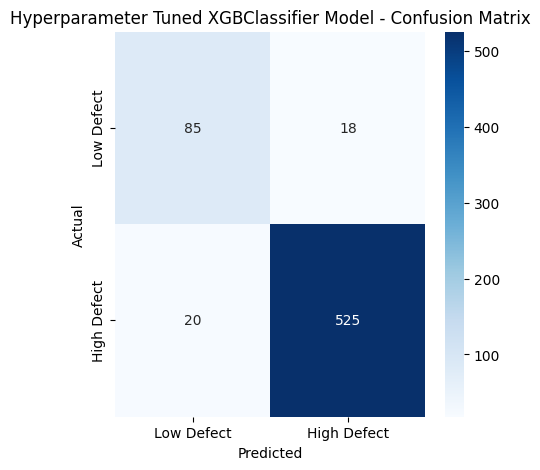

In [73]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, cobapredtest)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Defect', 'High Defect'], 
            yticklabels=['Low Defect', 'High Defect'])
plt.title('Hyperparameter Tuned XGBClassifier Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hasil dari confusion matrix untuk XGBoost yang sudah ditunning:

- True Positive: 85 items teridentifikasi sebagai low defect.
- False Positive: 18 items low defect teridentifikasi sebagai high defect.
- True Negative: 525 items berhasil teridentifikasi sebagai high defect.
- False Negative: 20 items high defect teridentifikasi sebagai low defect.

## Base Model vs Tuned Model

Kolom dibawah akan diisi dengan ketentuan bahwa positive class berada pada class 0 jadi score dibawah adalah score yang terdapat pada class 0.

| Base & Tuned Model Name | Train Score | Test Score | Precision Train | Precision Test | Recall Train | Recall Test | F1 Score train | F1 Score | Cross Validation Recall Mean |
|---|---|---|---|---|---|---|---|---|---|
| XGBClassifier | 0.9977 | 0.9429 | 1.0 | 0.82 | 1.0 | 0.82 | 1.0 | 0.82 | 0.9114|
| Tuned XGBClassifier | 0.9977 | 0.9413 | 1.0 | 0.81 | 1.0 | 0.83 | 1.0 | 0.82 | 0.9082 |

Perbandingan antara model sebelum hyperparameter tunning dan sesudah hyperparameter tunning, memiliki sedikit kenaikan pada proses setelah tunning dibagian  recall score yang memfokuskan kepada positivie label yaitu label 0. Kenaikan score sebesar 1% dari sebelumnya 82% menjadi 83%. Maka selanjutnya untuk model saving yang akan digunakan adalah model yang sudah melalui proses hyperparameter tunning.

Untuk dataset saya, hasil ini sebenarnya masih masuk dalam kategori overfit karena model tidak cukup baik dalam memprediksi sesuatu yang baru yaitu Test set. Sehingga dibutuhkan improvement supaya model ini tidak overfit. Hal ini mungkin disebabkan oleh proses oversampling yang mana proses tersebut adalah membuat data baru supaya data menjadi balance.

Namun jika dilihat dari cross val score yang tentu saja terfokus pada nilai recall dengan positif label terdapat pada label 0, model tidak memiliki beda yang signifikan. Jadi dapat dikatakan bahwa model adalah bestfit.

# IX. Model Saving

In [74]:
with open('model.pkl','wb') as file_1:
    pickle.dump(xgbc_grid,file_1)

# X. Model Inference

Model inference akan dilakukan pada notebook:
> P1M2_Syihabuddin_Ahmad_inf.ipynb

# XI. Kesimpulan

Pembuatan model klasifikasi dilakukan dengan terlebih dahulu mencoba ke-5 model untuk mengetahui model mana yang lebih baik dalam memprediksi sebuah kelas yang mengutamakan metric recall dengan positive label adalah 0 yaitu kelas minority dengan deskripsi sebagai low defect.

Model ini diharapkan untuk bisa menekan false negatif sedikit mungkin, karena jangan sampai model gagal memprediksi suatu item dengan prediksi low defect padahal aktualnya adalah high defect.

Dari ke-5 model yang telah dilakukan pengujiannya, ke-5 model memiliki rata-rata nilai recall pada test sebesar 82%. Lalu dalam menentukan model mana yang akan digunakan, maka dilakukan proses cross validation, cross validation dilakukan supaya pemilihan model terbaik memiliki keterangan yang sah.

Setelah cross validation dilakukan, didapatkan model yang memiliki cross val rata-rata terbaik adalah XGBoost Classifier. Setelahnya dilakukan hyperparameter tunning yang menghasilkan nilai recall meningkat sebesar 1% pada model yang sudah di tunning. Artinya model sudah berhasil memprediksi 83% nilai true negatif yaitu high defect.

Hal ini sangatlah berarti karena jika model lebih bisa memprediksi false negatif daripada true negatif dikhawatirkan akan banyak barang yang aktualnya adalah high defect tetapi teridentifikasi sebagai low defect, hal ini dapat menyebabkan turunnya nilai kepuasan dan kepercayaan calon customer kepada suatu perusahaan manufacturer. Mengapa hal ini dapat terjadi, ini karena model salah memprediksi barang yang seharusnya high defect tetapi diprediksi sebagai low defect.

Namun pada case yang saya teliti ini, model lebih dapat memprediksi data train dibanding data test, yang artinya model yang dibuat memiliki kelemahan dalam memprediksi hal yang baru yaitu data test. Hal ini mungkin disebabkan oleh proses oversampling yang membuat data train memiliki nilai sintesis yang banyak. Oversampling sendiri saya pilih karena dataset tidak memiliki banyak baris. Dikhawatirkan jika terlalu dikit, model tidak dapat belajar dengan baik.

Untuk improvement, sebaiknya jangan dilakukan oversampling, atau jika mau menambahkan data asli kedalam proses oversampling, karena jika menggunakan SMOTENC maka data sintesis menjadi lebih banyak dibanding data asli yang dapat menyebabkan model susah mempelajari data test.

## Conceptual Problems:

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!

Bootstrap aggregating atau yang lebih dikenal sebagai bagging adalah sebuah model machine learning yang dikhususkan untuk menyelesaikan sebuah masalah yang terdapat pada overfitting dan variance. <br><br>
Umumnya model machine learning lebih sering terjadi overfitting ketika memprediksi data test, yang artinya adalah model terlalu jago dalam menghafal data train, namun ketika ditest dengan sesuatu yang baru atau Test set, model jadi tidak bisa menjawab dengan benar.<br><br>
Cara kerja:<br>
**Bootstrapping**: Pertama model akan membagi kebeberapa kelas secara random dan menjalankan proses secara bersamaan dimasing masing kelas.<br><br>
**Model Training**: Pada setiap kelas yang sudah dibagi, selanjutnya semua kelas akan ditrain berdasarkan algoritma classifier.<br><br>
**Aggregation**: Setelah proses training dilakukan, model akan menggabungkan semua kelas yang dipecah menjadi satu untuk menghasilkan final output.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang anda pilih!

Beberapa perbedaannya:<br>
| Random Forest | XGBoost |
| --- | --- |
| Melatih tree secara paralel dan independen menggunakan metode bootstrap sampling dan secara random | Melatih tree secara berurutan atau squential, setiap pohon atau tree akan mengkoreksi error yang terdapat pada pohon sebelumnya. |
| Agregasi prediksi dari beberapa tree yang digabungkan kembali menjadi satu. | Optimasi melalui regularisasi, proses paralel dan tree prunning |
| Proses pembelajaran memakan waktu yang lebih efektif karena dilakukan secara paralel | Proses pembelajaran memakan waktu yang lebih lama karena prosesnya adalah secara squence dan mengkoreksi error dari tree sebelumnya |
| Proses paralel yang seringnya tidak memiliki akurasi yang tinggi | Proses Squential yang seringnya menghasilkan akurasi yang tinggi. |

### 3. Jelaskan apa yang dimaksud Cross Validation!

Cross validation adalah proses untuk mengevaluasi performa dari sebuah model machine learning dan memastikan bahwa model tersebut dapat diandalkan. Proses yang dilakukan adalah membagi data menjadi beberapa subset, yang disebut "folds". Proses ini akan dilakukan sebanyak folds yang didefinisikan, lalu setelahnya dicari rata-ratanya yang nantinya dapat digunakan sebagai pembanding antara beberapa model yang didefinisikan, untuk dipilih model yang lebih dapat diandalkan dengan nilai rata-rata cross validation tertinggi.

Intinya adalah cross validation, untuk menentukan model yang lebih baik dan dapat diandalkan.